In [1]:
from mcbj import *
import utils
import filter_traces 

import plots
import pandas as pd
from tqdm.notebook import tqdm
from matplotlib import rcParams
date = "21_12_08"
sample_rate = 50_000
# home_folder = Path(f"D:/BJ_Data/{date}")
home_folder = Path(f"//DATACENTER/BreakJunction_group/BJ_Data/{date}")
import numpy as np
from matplotlib.ticker import MultipleLocator

import matplotlib.pyplot as plt
# from mpl_toolkits.axes_grid.inset_locator import (inset_axes, InsetPosition,
#                                                   mark_inset)

In [2]:
hist_data = Histogram(folder=home_folder, start_trace=1, end_trace=8000,
                      conductance_range=(1e-6, 10),
                      conductance_bins_num=100,
                      conductance_log_scale=True,
                      conductance_bins_mode='total')
hist_data.calc_hist_1d()

  0%|          | 0/8000 [00:00<?, ?it/s]

<AxesSubplot:xlabel='Conductance $[G_{0}]$', ylabel='Normalized counts [a.u.]'>

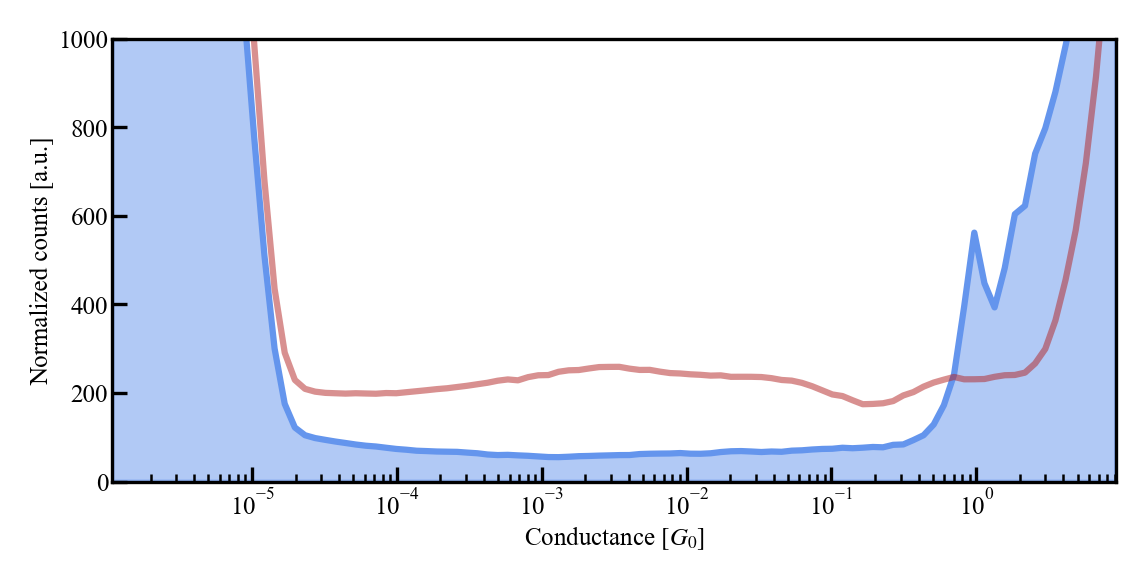

In [3]:
hist_data.plot_hist_1d(dpi=300, ylims=(0, 1000))

In [4]:
which_trace = np.random.choice(np.arange(1, 8001))
print(which_trace)
trace_pair = TracePair(f'trace_{which_trace}', load_from=home_folder)

7333


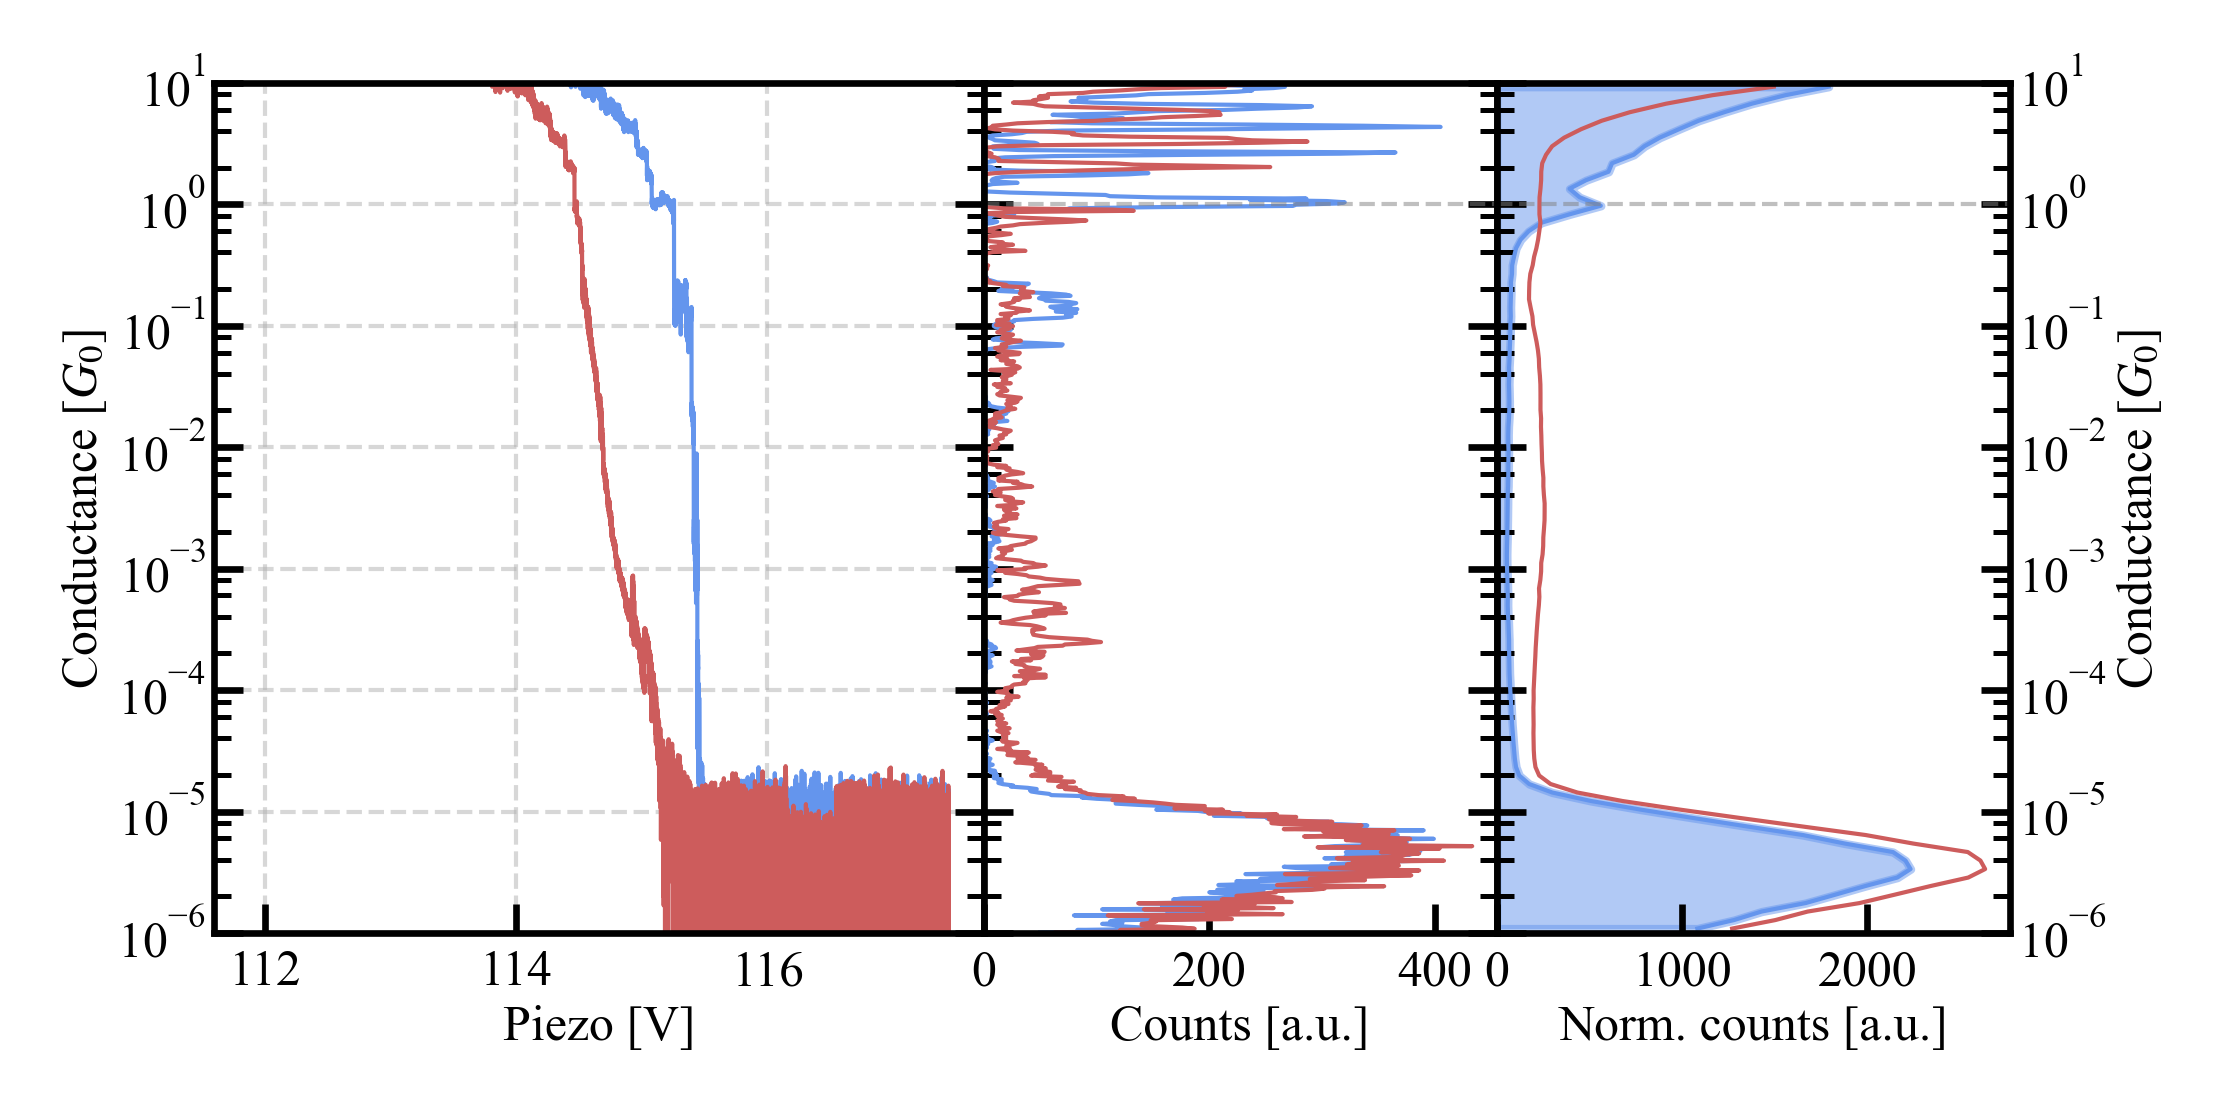

In [5]:
fig = plt.figure(figsize=utils.cm2inch(9.5, 4.5), dpi=600)  # figsize: (width, height) in inches

gs = gridspec.GridSpec(nrows=1, ncols=3, width_ratios=(3, 2, 2),
                           figure=fig, left=0.1, right=0.9, top=0.95, bottom=0.15, wspace=0, hspace=0)

ax_trace = fig.add_subplot(gs[0])
ax_single_hist = fig.add_subplot(gs[1])
ax_hist = fig.add_subplot(gs[2], sharey=ax_trace)

ax_hist.yaxis.set_label_position('right')
ax_hist.yaxis.tick_right()
ax_hist.yaxis.set_ticks_position('both')

ax_trace.yaxis.set_ticks_position('both')
ax_single_hist.yaxis.set_ticks_position('both')
ax_single_hist.set_yscale('log')

ax_trace = trace_pair.plot_trace_pair(ax=ax_trace)

# ax_single_hist.yaxis.set_major_locator(ticker.LogLocator(base=10.0, subs=(1.0,), numticks=9))
# ax_single_hist.yaxis.set_minor_locator(ticker.LogLocator(base=10.0, subs=np.arange(0, 1, 0.2), numticks=9))
ax_single_hist.set_yticks(ax_trace.get_yticks())
ax_single_hist.set_yticklabels(['']*len(ax_single_hist.get_yticks()))
ax_single_hist.set_yticks(ax_trace.get_yticks(minor=True), minor=True)
ax_single_hist.set_yticklabels(['']*len(ax_single_hist.get_yticks(minor=True)), minor=True)

ax_single_hist.set_ylim(ax_trace.get_ylim())

bins_pull, single_hist_pull = utils.calc_hist_1d_single(data=trace_pair.conductance_pull,
                                                        xrange=(1e-6, 10), xbins_num=100, log_scale=True)

bins_push, single_hist_push = utils.calc_hist_1d_single(data=trace_pair.conductance_push,
                                                        xrange=(1e-6, 10), xbins_num=100, log_scale=True)

ax_single_hist.plot(single_hist_pull, bins_pull, lw=0.5, c='cornflowerblue')
ax_hist.plot(hist_data.hist_1d_pull, hist_data.hist_1d_bins, lw=0.5, c='cornflowerblue')

ax_hist.fill_betweenx(hist_data.hist_1d_bins, hist_data.hist_1d_pull, np.zeros_like(hist_data.hist_1d_pull), alpha=0.5,
                      color='cornflowerblue')

ax_single_hist.plot(single_hist_push, bins_push, lw=0.5, c='indianred')
ax_hist.plot(hist_data.hist_1d_push, hist_data.hist_1d_bins, lw=0.5, c='indianred')

ax_single_hist.axhline(1, ls='--', lw=0.5, alpha=0.5, c='grey')
ax_hist.axhline(1, ls='--', lw=0.5, alpha=0.5, c='grey')

ax_single_hist.set_xlabel('Counts [a.u.]')
ax_hist.set_xlabel('Norm. counts [a.u.]')
ax_hist.set_ylabel(r'Conductance [$G_{0}$]')

ax_single_hist.set_xlim(0)
ax_hist.set_xlim(0)
# ax_trace.set_xlim(105, 108.5)

plt.savefig(home_folder.joinpath(f'results/article/trace_and_histograms_{which_trace}.png'))

In [6]:
# which_trace = np.random.choice(in_both[np.bitwise_and(relax_ratio_pull<10, relax_ratio_pull>2)])
which_trace=16245 # 16172
print(which_trace)

hold_trace = HoldTrace(which_trace, load_from=home_folder, bias_offset=0,
                       r_serial_ohm=100_000, min_step_len=20_000, min_height=1)
trace_pair = TracePair(f'trace_{which_trace}', load_from=home_folder)
hold_trace.analyse_hold_trace(num_of_fft=1)

16245


(1e-05, 0.05)

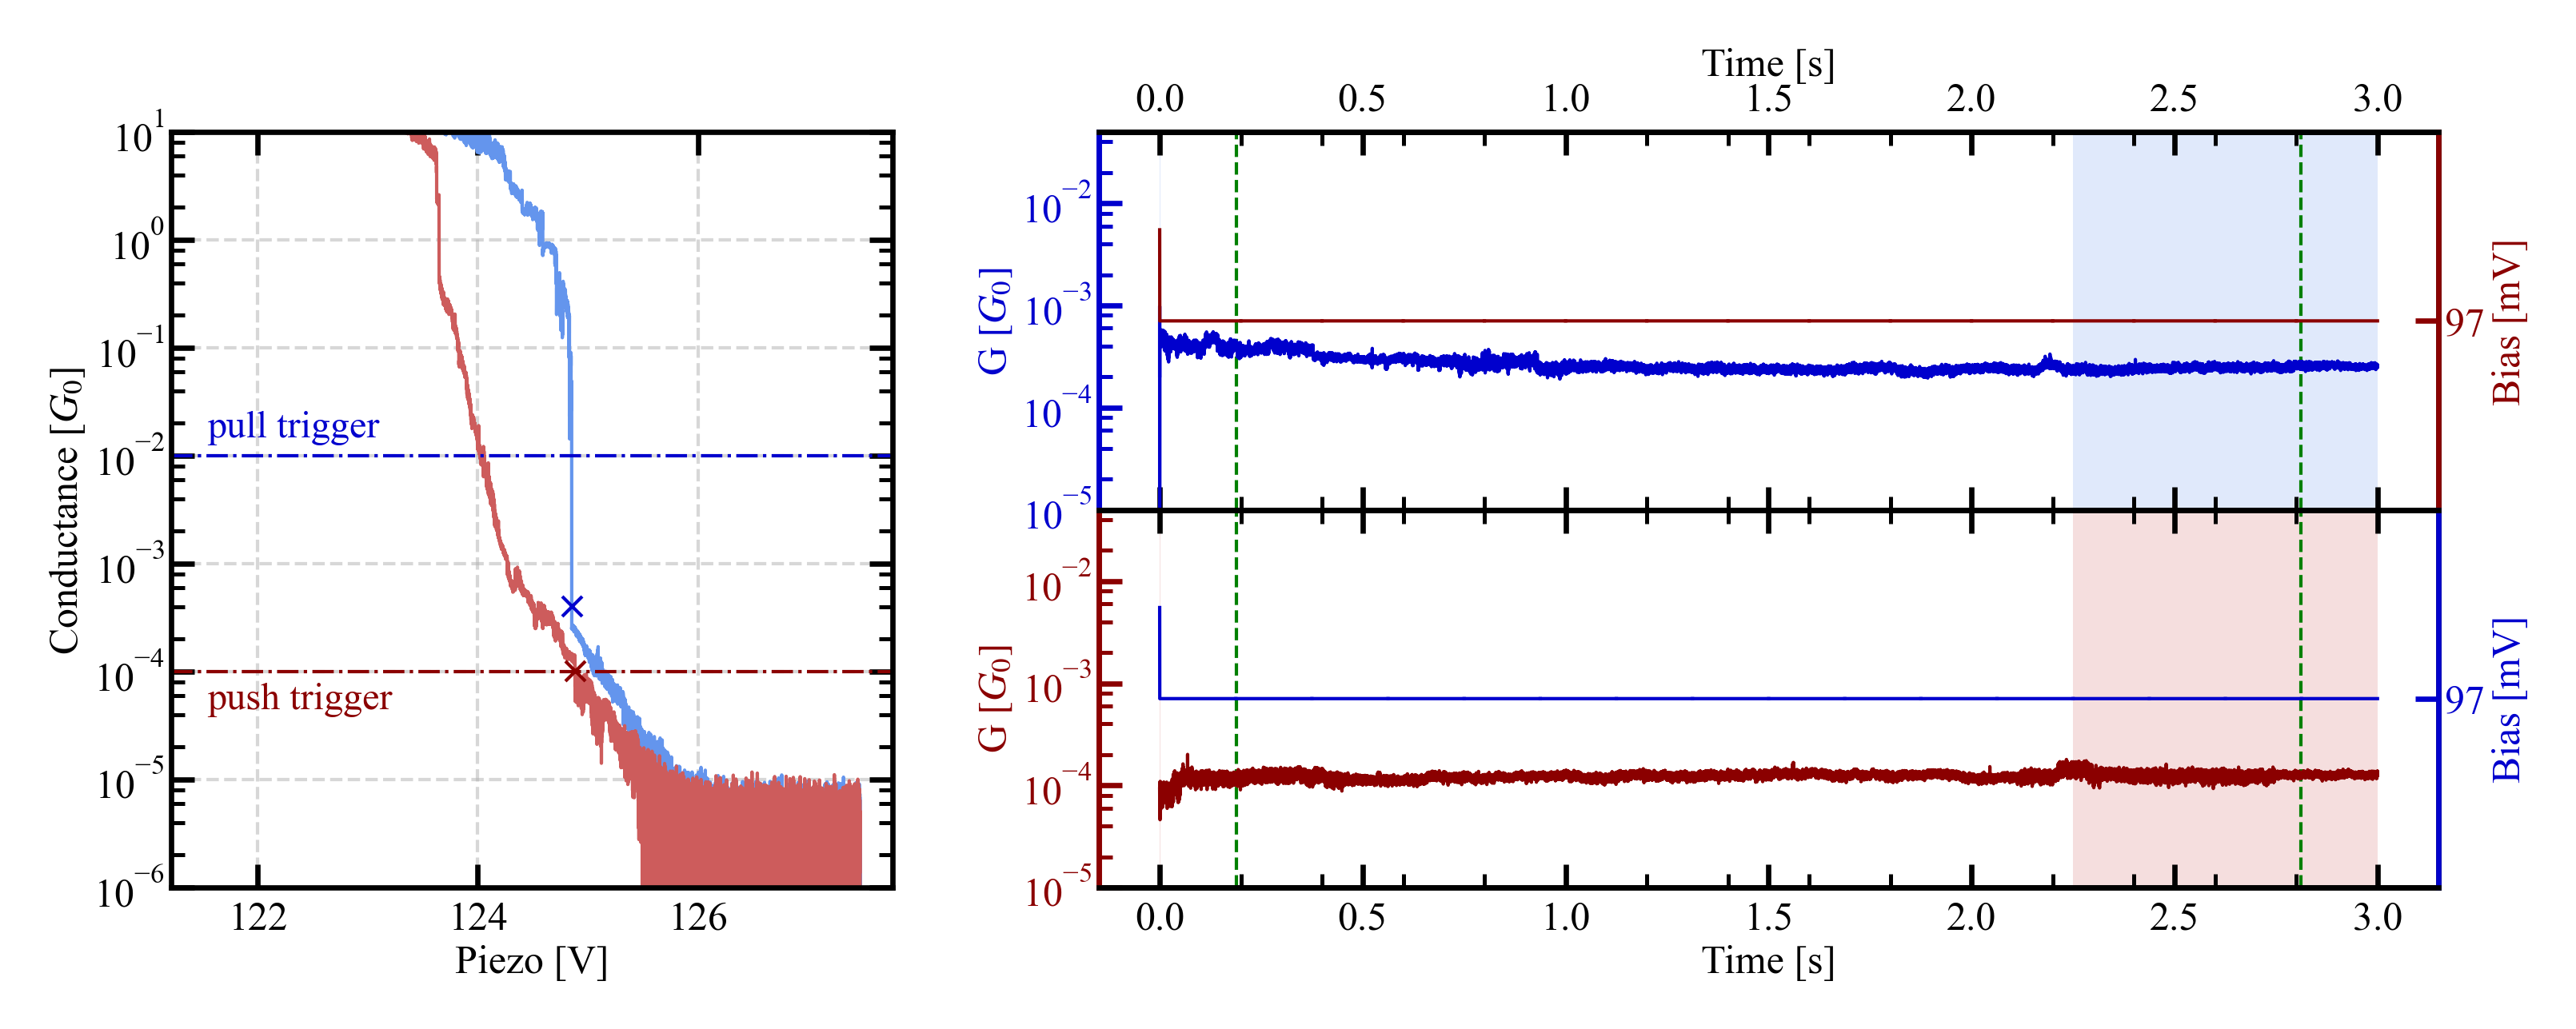

In [7]:
ax_trace, ax_pull, ax_push = plots.plot_measurement_scheme(trace_pair=trace_pair,
                                                           hold_trace=hold_trace,
                                                           home_folder=home_folder,
                                                           main_colors=('cornflowerblue', 'indianred'),
                                                           accent_colors=('mediumblue', 'darkred'),
                                                           save_fig=False,
                                                           xlim=None, smoothing=1)
# ax_pull.axvline(3*len(hold_trace.hold_conductance_pull)/4/50_000, ls='--', c='grey', alpha=0.3, lw = 0.8)
# ax_push.axvline(3*len(hold_trace.hold_conductance_push)/4/50_000, ls='--', c='grey', alpha=0.3, lw = 0.8)
ax_pull.axvspan(20/50_000, 50/50_000, alpha=0.2, color='cornflowerblue', ec=None)
ax_pull.axvspan(3*len(hold_trace.hold_conductance_pull)/4/50_000,
           len(hold_trace.hold_conductance_pull)/50_000, alpha=0.2, color='cornflowerblue', ec=None)
ax_push.axvspan(20/50_000, 50/50_000, alpha=0.2, color='indianred', ec=None)
ax_push.axvspan(3*len(hold_trace.hold_conductance_push)/4/50_000,
           len(hold_trace.hold_conductance_push)/50_000, alpha=0.2, color='indianred', ec=None)
ax_pull.set_ylim(1e-5)
ax_push.set_ylim(1e-5)
# ax_pull.set_xlim(-0.0005, 0.002)
# ax_push.set_xlim(-0.0005, 0.002)

In [8]:
hold_1_total = np.arange(8001, 14001)
hold_2_total = np.arange(14001, 23001)
print(hold_1_total)
print(hold_2_total)

[ 8001  8002  8003 ... 13998 13999 14000]
[14001 14002 14003 ... 22998 22999 23000]


In [60]:
NoiseStats(folder=home_folder, bias_offset=0, traces=hold_1_total,
           num_of_fft=1, subtract_bg=False,
           min_step_len=20_000, min_height=100,
           iv=None, save_data=23035)

  0%|          | 0/6000 [00:00<?, ?it/s]

Data saved.


In [61]:
NoiseStats(folder=home_folder, bias_offset=0, traces=hold_2_total,
           num_of_fft=1, subtract_bg=False,
           min_step_len=20_000, min_height=100,
           iv=None, save_data=23036)

  0%|          | 0/9000 [00:00<?, ?it/s]

Data saved.


## HOLD ON
### pull_hold = 1e-2
### push_hold = 1e-3

In [9]:
pull_hold_1, push_hold_1 = filter_traces.filter_hold(folder=home_folder,
                                                     filter_condition=filter_traces.does_not_break_array,
                                                     start_trace=8001, end_trace=14000, min_step_len=20_000, r_serial_ohm=99_900)

  0%|          | 0/6000 [00:00<?, ?it/s]

## HOLD ON
### pull_hold = 1e-2
### push_hold = 1e-4

In [28]:
pull_hold_2, push_hold_2 = filter_traces.filter_hold(folder=home_folder,
                                                     filter_condition=filter_traces.does_not_break_array,
                                                     start_trace=14001, end_trace=23000, min_step_len=20_000, r_serial_ohm=99_900)

  0%|          | 0/9000 [00:00<?, ?it/s]

In [30]:
print(pull_hold_1.shape)
print(push_hold_1.shape)
print(np.intersect1d(pull_hold_1, push_hold_1).shape)

(2635,)
(5998,)
(2634,)


In [29]:
print(pull_hold_2.shape)
print(push_hold_2.shape)
print(np.intersect1d(pull_hold_2, push_hold_2).shape)

(2988,)
(8511,)
(2775,)


In [12]:
# NoiseStats(folder=home_folder, bias_offset=0, traces=pull_hold_1,
#            num_of_fft=1, subtract_bg=False,
#            min_step_len=20_000, min_height=100,
#            iv=None, save_data=23031)

In [13]:
# NoiseStats(folder=home_folder, bias_offset=0, traces=push_hold_1,
#            num_of_fft=1, subtract_bg=False,
#            min_step_len=20_000, min_height=100,
#            iv=None, save_data=23032)

In [14]:
# NoiseStats(folder=home_folder, bias_offset=0, traces=pull_hold_2,
#            num_of_fft=1, subtract_bg=False,
#            min_step_len=20_000, min_height=100,
#            iv=None, save_data=23033)

In [15]:
# NoiseStats(folder=home_folder, bias_offset=0, traces=push_hold_2,
#            num_of_fft=1, subtract_bg=False,
#            min_step_len=20_000, min_height=100,
#            iv=None, save_data=23034)

In [10]:
conductance_stat_pull_1 = pd.read_csv(home_folder.joinpath("results/conductance_stats_pull_23031.csv"), skiprows=[1])
conductance_stat_pull_2 = pd.read_csv(home_folder.joinpath("results/conductance_stats_pull_23033.csv"), skiprows=[1])

In [11]:
conductance_stat_pull = pd.concat([conductance_stat_pull_1, conductance_stat_pull_2])

In [12]:
conductance_stat_pull
# G_set : set trigger value
# G_stop : the value that triggered the stop
# G_hold : conductance avg in the beginning (50:100) (skip the 1st 50 points as a 'wait' while the junction stabilizes
# G_avg : conductance avg at the end of the hold measurement (-100:-50)

,trace_index,G_set,G_stop,G_hold,G_avg,G_avgs_1,G_avgs_2,G_avgs_3,G_avgs_4,G_avgs_5,...,G_avgs_16,G_avgs_17,G_avgs_18,G_avgs_19,G_avgs_20,G_avgs_21,G_avgs_22,G_avgs_23,G_avgs_24,G_avgs_25
0,8008.0,0.01,0.008526,0.011201,0.001550,0.011201,0.008178,0.003504,0.004790,0.004222,...,0.002807,0.002812,0.002678,0.003032,0.002969,0.003163,0.002983,0.003081,0.002839,0.001556
1,8012.0,0.01,0.009886,0.010388,0.003346,0.010388,0.006020,0.002041,0.002924,0.002776,...,0.002279,0.003249,0.003017,0.002455,0.001709,0.002844,0.003609,0.003374,0.002767,0.003345
2,8014.0,0.01,0.010291,0.011887,0.000592,0.011887,0.001653,0.001599,0.000832,0.001482,...,0.000524,0.000500,0.000522,0.000430,0.000560,0.000420,0.000427,0.000384,0.000349,0.000583
3,8017.0,0.01,0.009756,0.010644,0.002130,0.010644,0.012036,0.008464,0.009204,0.005089,...,0.002162,0.002305,0.002273,0.002363,0.002069,0.002200,0.002272,0.001926,0.001725,0.002128
4,8019.0,0.01,0.002371,0.003323,0.002648,0.003323,0.003877,0.002796,0.003883,0.004180,...,0.002748,0.002699,0.002061,0.001789,0.002086,0.002116,0.002714,0.002964,0.003296,0.002657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2983,22954.0,0.01,0.008355,0.002811,0.000132,0.002811,0.000702,0.000846,0.000615,0.000735,...,0.000164,0.000166,0.000201,0.000176,0.000180,0.000144,0.000171,0.000163,0.000131,0.000131
2984,22963.0,0.01,0.009125,0.000791,0.000029,0.000791,0.001883,0.001959,0.001396,0.001399,...,0.000884,0.000893,0.001118,0.000038,0.000044,0.000059,0.000045,0.000055,0.000062,0.000029
2985,22975.0,0.01,0.003398,0.006827,0.001953,0.006827,0.002160,0.001960,0.001514,0.001424,...,0.001957,0.001844,0.001514,0.001633,0.001564,0.001629,0.001827,0.001550,0.002042,0.001956
2986,22982.0,0.01,0.009692,0.015990,0.000225,0.015990,0.000800,0.000646,0.000182,0.000426,...,0.000274,0.000241,0.000239,0.000216,0.000237,0.000230,0.000264,0.000217,0.000229,0.000224


In [13]:
conductance_stat_push_1 = pd.read_csv(home_folder.joinpath("results/conductance_stats_push_23032.csv"), skiprows=[1])
conductance_stat_push_2 = pd.read_csv(home_folder.joinpath("results/conductance_stats_push_23034.csv"), skiprows=[1])

In [14]:
conductance_stat_push_1.head()

,trace_index,G_set,G_stop,G_hold,G_avg,G_avgs_1,G_avgs_2,G_avgs_3,G_avgs_4,G_avgs_5,...,G_avgs_16,G_avgs_17,G_avgs_18,G_avgs_19,G_avgs_20,G_avgs_21,G_avgs_22,G_avgs_23,G_avgs_24,G_avgs_25
0,8001.0,0.001,0.001043,0.000895,0.001272,0.000895,0.001152,0.001459,0.000856,0.000752,...,0.000509,0.000527,0.001061,0.001503,0.001459,0.001533,0.001427,0.001250,0.000567,0.001271
1,8002.0,0.001,0.001033,0.000794,0.001598,0.000794,0.001099,0.001301,0.001401,0.001312,...,0.001536,0.001544,0.001585,0.001623,0.001658,0.001693,0.000740,0.001469,0.001433,0.001595
2,8003.0,0.001,0.001045,0.000682,0.000541,0.000682,0.000679,0.000730,0.000831,0.000741,...,0.000306,0.000579,0.000428,0.001257,0.000313,0.000449,0.000700,0.000531,0.000287,0.000541
3,8004.0,0.001,0.000992,0.000742,0.001515,0.000742,0.001151,0.002252,0.002765,0.003142,...,0.001872,0.001936,0.001755,0.001860,0.001604,0.001524,0.001553,0.001556,0.001526,0.001512
4,8005.0,0.001,0.000844,0.001381,0.001327,0.001381,0.002235,0.002305,0.002120,0.002359,...,0.001267,0.001425,0.001260,0.001226,0.001124,0.001247,0.001023,0.001212,0.001214,0.001328


In [15]:
conductance_stat_push_2.head()

,trace_index,G_set,G_stop,G_hold,G_avg,G_avgs_1,G_avgs_2,G_avgs_3,G_avgs_4,G_avgs_5,...,G_avgs_16,G_avgs_17,G_avgs_18,G_avgs_19,G_avgs_20,G_avgs_21,G_avgs_22,G_avgs_23,G_avgs_24,G_avgs_25
0,14001.0,0.0001,0.000105,0.000064,0.000081,0.000064,0.000091,0.000033,0.000040,0.000037,...,0.000045,0.000050,0.000049,0.000049,0.000054,0.000047,0.000068,0.000054,0.000062,0.000082
1,14002.0,0.0001,0.000102,0.000080,0.000063,0.000080,0.000080,0.000053,0.000052,0.000069,...,0.000032,0.000035,0.000037,0.000050,0.000061,0.000049,0.000052,0.000058,0.000066,0.000063
2,14003.0,0.0001,0.000103,0.000065,0.000175,0.000065,0.000194,0.000170,0.000202,0.000237,...,0.000176,0.000182,0.000176,0.000179,0.000119,0.000218,0.000199,0.000194,0.000206,0.000175
3,14004.0,0.0001,0.000098,0.000091,0.000107,0.000091,0.000066,0.000079,0.000094,0.000085,...,0.000085,0.000103,0.000093,0.000095,0.000089,0.000084,0.000101,0.000120,0.000099,0.000107
4,14005.0,0.0001,0.000101,0.000090,0.000165,0.000090,0.000308,0.000295,0.000358,0.000328,...,0.000519,0.000134,0.000141,0.000131,0.000142,0.000155,0.000150,0.000152,0.000179,0.000165


In [16]:
conductance_stat_pull_total_1 = pd.read_csv(home_folder.joinpath("results/conductance_stats_pull_23035.csv"), skiprows=[1])
conductance_stat_push_total_1 = pd.read_csv(home_folder.joinpath("results/conductance_stats_push_23035.csv"), skiprows=[1])
conductance_stat_pull_total_2 = pd.read_csv(home_folder.joinpath("results/conductance_stats_pull_23036.csv"), skiprows=[1])
conductance_stat_push_total_2 = pd.read_csv(home_folder.joinpath("results/conductance_stats_push_23036.csv"), skiprows=[1])

In [17]:
conductance_stat_pull_total = pd.concat([conductance_stat_pull_total_1, conductance_stat_pull_total_2])

In [18]:
def calc_and_plot_stability_histograms(pull_df, push_df,
                                       ylims_pull: Optional[Tuple[float, float, float]] = None,
                                       ylims_push : Optional[Tuple[float, float, float]] = None,
                                       select_columns: Tuple[str, ...] = ('G_stop', 'G_hold', 'G_avg'),
                                       xrange: Tuple[float, float] = (1e-5, 1e-1), xbins_num: int = 100, bin_mode='decade'):
    
    bins_pull_all, bins_push_all = [], []
    hist_pull_all, hist_push_all = [], []
    
    for col in select_columns:
        # calculate pull and push histograms
        bins_pull, hist_pull = utils.calc_hist_1d_single(data=pull_df[col],
                                                         xrange=xrange,
                                                         xbins_num=xbins_num,
                                                         log_scale=True, bin_mode=bin_mode)

        bins_push, hist_push = utils.calc_hist_1d_single(data=push_df[col],
                                                         xrange=xrange,
                                                         xbins_num=xbins_num,
                                                         log_scale=True, bin_mode=bin_mode)
        # normalize by the number of traces
        hist_pull = hist_pull/len(pull_df[col])
        hist_push = hist_push/len(push_df[col])
        
        bins_pull_all.append(bins_pull)
        bins_push_all.append(bins_push)
        hist_pull_all.append(hist_pull)
        hist_push_all.append(hist_push)

    fig = plt.figure(figsize=utils.cm2inch(5, 5), dpi=300)  # figsize: (width, height) in inches

    gs_total = gridspec.GridSpec(nrows=2, ncols=1, height_ratios=(1, 1),
                                 figure=fig, left=0.1, right=0.9, top=0.9, bottom=0.2, wspace=0.2, hspace=0)

    gs_top = gridspec.GridSpecFromSubplotSpec(nrows=2, ncols=1, height_ratios=(1, 1),
                                              subplot_spec=gs_total[0],
                                              wspace=0, hspace=0.1)

    gs_bottom = gridspec.GridSpecFromSubplotSpec(nrows=2, ncols=1, height_ratios=(1, 1),
                                                 subplot_spec=gs_total[1],
                                                 wspace=0, hspace=0.1)

    ax_pull_top_hist = fig.add_subplot(gs_top[0])
    ax_pull_bot_hist = fig.add_subplot(gs_top[1])
    ax_push_top_hist = fig.add_subplot(gs_bottom[0])
    ax_push_bot_hist = fig.add_subplot(gs_bottom[1])

    ax_pull_top_hist.spines['bottom'].set_visible(False)
    ax_pull_bot_hist.spines['top'].set_visible(False)
    ax_push_top_hist.spines['bottom'].set_visible(False)
    ax_push_bot_hist.spines['top'].set_visible(False)

    ax_pull_top_hist.xaxis.set_label_position('top')
    ax_pull_top_hist.xaxis.tick_top()
    ax_push_top_hist.xaxis.tick_top()

    ax_pull_top_hist.set_xscale('log')
    ax_push_top_hist.set_xscale('log')
    ax_pull_bot_hist.set_xscale('log')
    ax_push_bot_hist.set_xscale('log')

    ax_pull_top_hist.yaxis.set_ticks_position('both')
    ax_push_top_hist.yaxis.set_ticks_position('both')
    ax_pull_bot_hist.yaxis.set_ticks_position('both')
    ax_push_bot_hist.yaxis.set_ticks_position('both')
    
    for i in range(len(select_columns)):
        for ax in (ax_pull_top_hist, ax_pull_bot_hist):
            ax.plot(bins_pull_all[i], hist_pull_all[i], c=utils.blues[i], lw=0.7, label=select_columns[i])
            ax.set_xlim(xrange)
            
        for ax in (ax_push_top_hist, ax_push_bot_hist):
            ax.plot(bins_push_all[i], hist_push_all[i], c=utils.reds[i], lw=0.7, label=select_columns[i])
            ax.set_xlim(xrange)
    
    if ylims_pull is None:
        lim1 = 1.2*min(map(max, hist_pull_all))
        lim2 = 1.3*max(map(max, hist_pull_all))
        ax_pull_top_hist.set_ylim(lim1, lim2)
        ax_pull_bot_hist.set_ylim(0, lim1)
    else:
        ax_pull_top_hist.set_ylim(ylims_pull[1], ylims_pull[2])
        ax_pull_bot_hist.set_ylim(ylims_pull[0], ylims_pull[1])

    if ylims_push is None:
        lim1 = 1.2*min(map(max, hist_push_all))
        lim2 = 1.3*max(map(max, hist_push_all))
        ax_push_top_hist.set_ylim(lim1, lim2)
        ax_push_bot_hist.set_ylim(0, lim1)
    else:
        ax_push_top_hist.set_ylim(ylims_push[1], ylims_push[2])
        ax_push_bot_hist.set_ylim(ylims_push[0], ylims_push[1])

    ax_pull_bot_hist.axes.xaxis.set_ticklabels([])
    ax_push_top_hist.axes.xaxis.set_ticklabels([])

    ax_pull_top_hist.set_xlabel(r'G [$G_{0}$]')
    ax_push_bot_hist.set_xlabel(r'G [$G_{0}$]')

    ax_pull_bot_hist.text(1.5e-6, 0, 'Normalized counts [a.u.]', rotation='vertical', va='center', size=6)
    ax_pull_bot_hist.xaxis.set_major_locator(ticker.LogLocator(base=10.0, subs=(1.0,), numticks=9))

    ax_pull_top_hist.legend(fontsize=6, bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0.)
    ax_push_top_hist.legend(fontsize=6, bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0.)
    
    return ax_pull_top_hist, ax_pull_bot_hist, ax_push_top_hist, ax_push_bot_hist

# Figure 1

**no filter**

pull is for **15000** traces, push for the trigger setting **1e-3**, i.e. **6000** traces

(<AxesSubplot:xlabel='G [$G_{0}$]'>,
 <AxesSubplot:>,
 <AxesSubplot:>,
 <AxesSubplot:xlabel='G [$G_{0}$]'>)

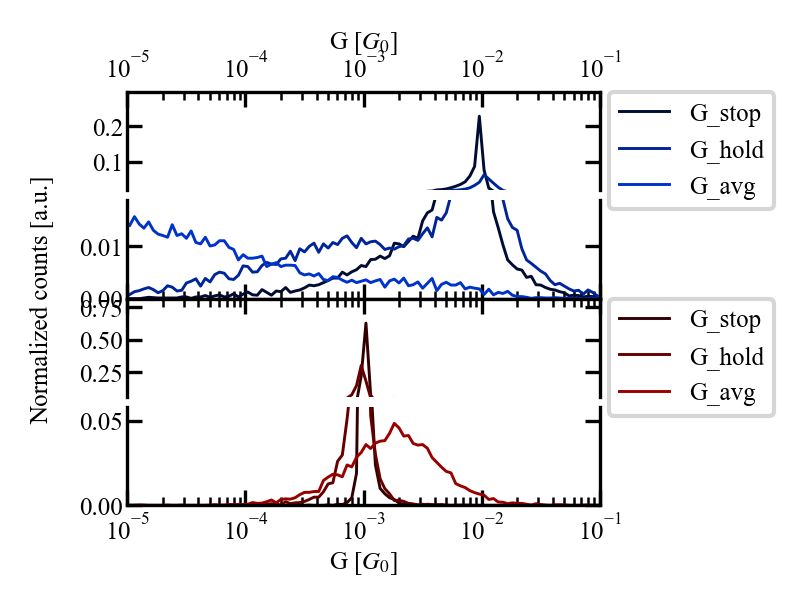

In [19]:
calc_and_plot_stability_histograms(conductance_stat_pull_total, conductance_stat_push_total_1, select_columns=('G_stop', 'G_hold', 'G_avg'),
                                   xrange=(1e-5, 1e-1), xbins_num=100, bin_mode='total')

**no filter**

pull is for **15000** traces, push for the trigger setting **1e-4**, i.e. **9000** traces

(<AxesSubplot:xlabel='G [$G_{0}$]'>,
 <AxesSubplot:>,
 <AxesSubplot:>,
 <AxesSubplot:xlabel='G [$G_{0}$]'>)

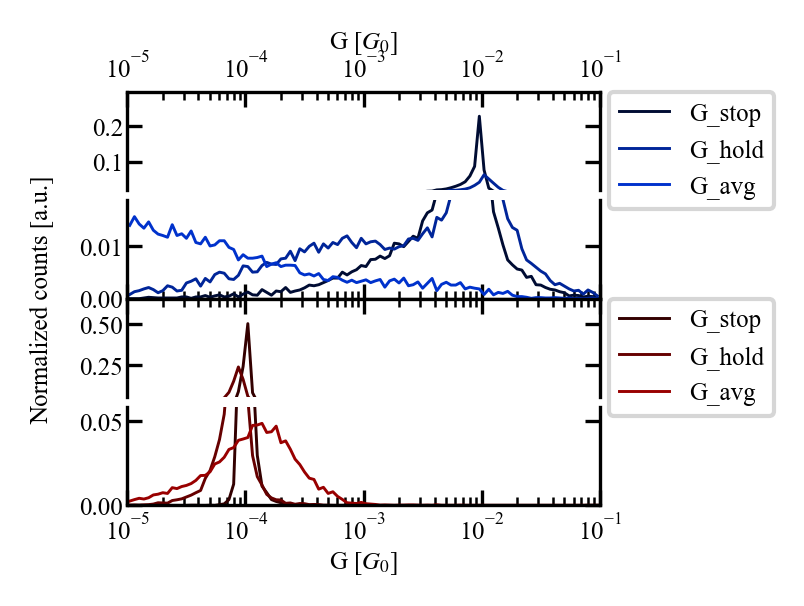

In [20]:
calc_and_plot_stability_histograms(conductance_stat_pull_total, conductance_stat_push_total_2, select_columns=('G_stop', 'G_hold', 'G_avg'),
                                   xrange=(1e-5, 1e-1), xbins_num=100, bin_mode='total')

In [21]:
conductance_stat_push_2

,trace_index,G_set,G_stop,G_hold,G_avg,G_avgs_1,G_avgs_2,G_avgs_3,G_avgs_4,G_avgs_5,...,G_avgs_16,G_avgs_17,G_avgs_18,G_avgs_19,G_avgs_20,G_avgs_21,G_avgs_22,G_avgs_23,G_avgs_24,G_avgs_25
0,14001.0,0.0001,0.000105,0.000064,0.000081,0.000064,0.000091,0.000033,0.000040,0.000037,...,0.000045,0.000050,0.000049,0.000049,0.000054,0.000047,0.000068,0.000054,0.000062,0.000082
1,14002.0,0.0001,0.000102,0.000080,0.000063,0.000080,0.000080,0.000053,0.000052,0.000069,...,0.000032,0.000035,0.000037,0.000050,0.000061,0.000049,0.000052,0.000058,0.000066,0.000063
2,14003.0,0.0001,0.000103,0.000065,0.000175,0.000065,0.000194,0.000170,0.000202,0.000237,...,0.000176,0.000182,0.000176,0.000179,0.000119,0.000218,0.000199,0.000194,0.000206,0.000175
3,14004.0,0.0001,0.000098,0.000091,0.000107,0.000091,0.000066,0.000079,0.000094,0.000085,...,0.000085,0.000103,0.000093,0.000095,0.000089,0.000084,0.000101,0.000120,0.000099,0.000107
4,14005.0,0.0001,0.000101,0.000090,0.000165,0.000090,0.000308,0.000295,0.000358,0.000328,...,0.000519,0.000134,0.000141,0.000131,0.000142,0.000155,0.000150,0.000152,0.000179,0.000165
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8506,22996.0,0.0001,0.000106,0.000083,0.000252,0.000083,0.000102,0.000101,0.000162,0.000200,...,0.000173,0.000210,0.000196,0.000209,0.000226,0.000241,0.000235,0.000234,0.000232,0.000252
8507,22997.0,0.0001,0.000128,0.000119,0.000279,0.000119,0.000221,0.000244,0.000147,0.000394,...,0.000202,0.000189,0.000211,0.000216,0.000223,0.000208,0.000259,0.000158,0.000134,0.000279
8508,22998.0,0.0001,0.000095,0.000077,0.000107,0.000077,0.000110,0.000096,0.000111,0.000108,...,0.000093,0.000077,0.000081,0.000088,0.000106,0.000089,0.000107,0.000108,0.000099,0.000107
8509,22999.0,0.0001,0.000094,0.000111,0.000077,0.000111,0.000113,0.000112,0.000040,0.000048,...,0.000070,0.000088,0.000078,0.000081,0.000063,0.000090,0.000080,0.000117,0.000124,0.000077


**select traces where the conductance doesn't go below 1e-5**

pull is for **5623** traces, push for the trigger setting **1e-3**, i.e. **5998** traces

(<AxesSubplot:xlabel='G [$G_{0}$]'>,
 <AxesSubplot:>,
 <AxesSubplot:>,
 <AxesSubplot:xlabel='G [$G_{0}$]'>)

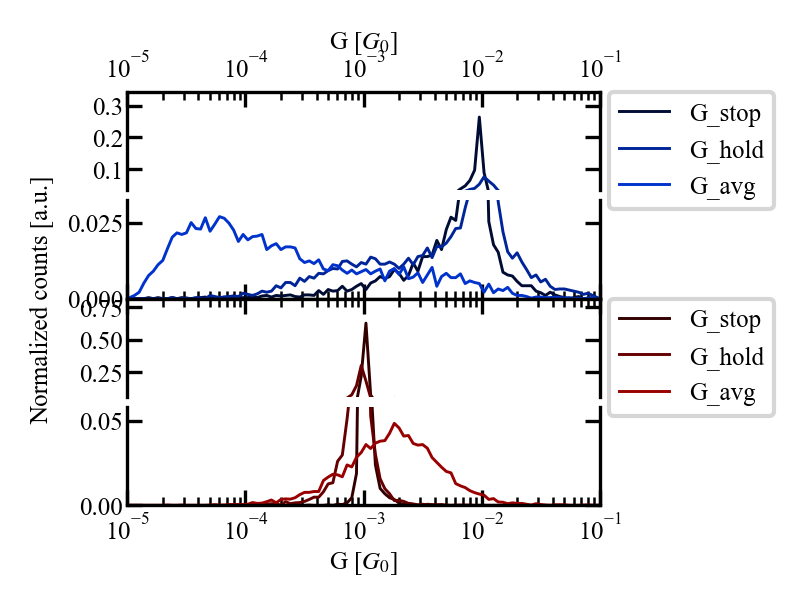

In [22]:
calc_and_plot_stability_histograms(conductance_stat_pull, conductance_stat_push_1, select_columns=('G_stop', 'G_hold', 'G_avg'),
                                   xrange=(1e-5, 1e-1), xbins_num=100, bin_mode='total')

**select traces where the conductance doesn't go below 1e-5**

pull is for **5623** traces, push for the trigger setting **1e-4**, i.e. **8511** traces

(<AxesSubplot:xlabel='G [$G_{0}$]'>,
 <AxesSubplot:>,
 <AxesSubplot:>,
 <AxesSubplot:xlabel='G [$G_{0}$]'>)

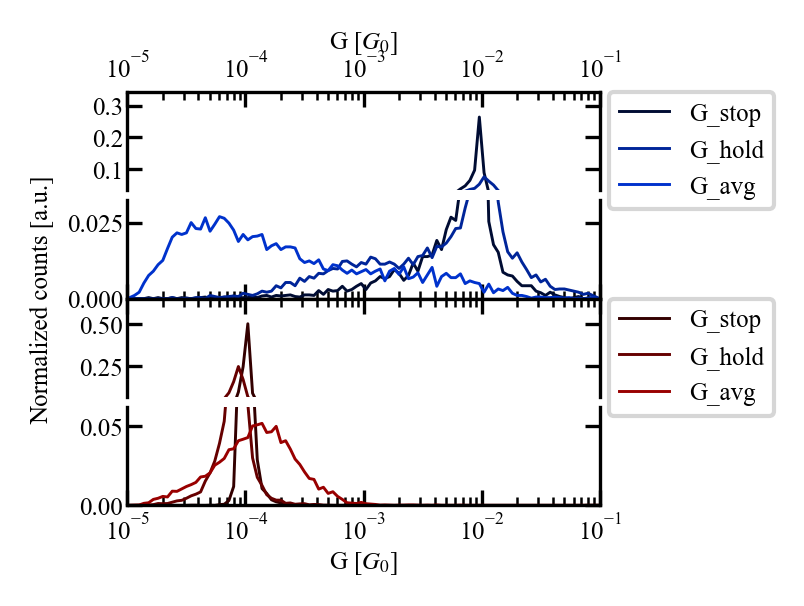

In [128]:
calc_and_plot_stability_histograms(conductance_stat_pull, conductance_stat_push_2, select_columns=('G_stop', 'G_hold', 'G_avg'),
                                   xrange=(1e-5, 1e-1), xbins_num=100, bin_mode='total')

# Figure 2

In [23]:
def calc_hold_histogram(traces: np.ndarray, direction: str = 'pull',
                        xrange: Tuple[int, int] = (0, 150_000), xbins_num: int = 15_000,
                        yrange: Tuple[float, float] = (1e-2, 100), ybins_num: int = 100, y_bin_mode: str = 'total'):
    pull_conds = list()
    count=0

    # if 'H_pull' in locals():
    #     del(H_pull)

    # if 'H_push' in locals():
    #     del(H_push)

    relax_times = []

    xbins = np.linspace(xrange[0], xrange[1], num=xbins_num+1)  # ~for each trace 10 points in each horizontal bin
    
    if y_bin_mode == 'decade':
        num_of_decs = np.log10(yrange[1]) - np.log10(yrange[0])
        ybins = np.logspace(np.log10(yrange[0]), np.log10(yrange[1]), num=int(ybins_num * num_of_decs)+1, base=10)
    else:
        ybins = np.logspace(np.log10(yrange[0]), np.log10(yrange[1]), num=ybins_num+1, base=10)

    for trace_num in tqdm(traces, desc="Processing traces"):
        try:
            bj_trace = TracePair(trace=trace_num, load_from=home_folder)
            hold_trace = HoldTrace(trace=trace_num, load_from=home_folder,
                                   bias_offset=0, r_serial_ohm=bj_trace.R_serial,
                                   sample_rate=bj_trace.sample_rate, min_step_len=20_000)
            
            if direction == 'pull':
                hold_conductance = hold_trace.hold_conductance_pull
            elif direction == 'push':
                hold_conductance = hold_trace.hold_conductance_push
            else:
                raise ValueError(f'Unknown direction {direction}. Valid values: "pull", "push".')

            h, xedges, yedges = np.histogram2d(np.arange(0, hold_conductance.shape[0]),
                                               hold_conductance/hold_conductance[-1],
                                               bins=[xbins, ybins])
            x_mesh, y_mesh = np.meshgrid(xedges, yedges)
            
            try:
                H += h.T
            except NameError:
                H = h.T

            count += 1

            relax_ends_at, relax_time, relax_amount = filter_traces.measure_relaxation(hold_conductance,
                                                                                       conductance_limit=2)
            relax_times.append(relax_time)

        except KeyError:
            break

    bins_relax_time, hist_relax_time = utils.calc_hist_1d_single(data=relax_times,
                                                                 xrange=(0, 3),
                                                                 xbins_num=30,
                                                                 log_scale=False)
    
    return x_mesh, y_mesh, H, bins_relax_time, hist_relax_time

In [24]:
x_mesh_pull_all_1, y_mesh_pull_all_1, H_pull_all_1, bins_relax_time_pull_all_1, hist_relax_time_pull_all_1 =\
    calc_hold_histogram(traces = hold_1_total, direction='pull',
                        xrange=(0, 150_000), xbins_num=15_000,
                        yrange=(1e-2, 1000), ybins_num=30, y_bin_mode='decade')

x_mesh_push_all_1, y_mesh_push_all_1, H_push_all_1, bins_relax_time_push_all_1, hist_relax_time_push_all_1 =\
    calc_hold_histogram(traces = hold_1_total, direction='push',
                        xrange=(0, 150_000), xbins_num=15_000,
                        yrange=(1e-2, 1000), ybins_num=30, y_bin_mode='decade')

Processing traces:   0%|          | 0/6000 [00:00<?, ?it/s]

Processing traces:   0%|          | 0/6000 [00:00<?, ?it/s]

In [25]:
x_mesh_pull_all_2, y_mesh_pull_all_2, H_pull_all_2, bins_relax_time_pull_all_2, hist_relax_time_pull_all_2 =\
    calc_hold_histogram(traces = hold_2_total, direction='pull',
                        xrange=(0, 150_000), xbins_num=15_000,
                        yrange=(1e-2, 1000), ybins_num=30, y_bin_mode='decade')

x_mesh_push_all_2, y_mesh_push_all_2, H_push_all_2, bins_relax_time_push_all_2, hist_relax_time_push_all_2 =\
    calc_hold_histogram(traces = hold_2_total, direction='push',
                        xrange=(0, 150_000), xbins_num=15_000,
                        yrange=(1e-2, 100), ybins_num=30, y_bin_mode='decade')

Processing traces:   0%|          | 0/9000 [00:00<?, ?it/s]

Processing traces:   0%|          | 0/9000 [00:00<?, ?it/s]

In [26]:
x_mesh_pull_filt_1, y_mesh_pull_filt_1, H_pull_filt_1, bins_relax_time_pull_filt_1, hist_relax_time_pull_filt_1 =\
    calc_hold_histogram(traces = pull_hold_1, direction='pull',
                        xrange=(0, 150_000), xbins_num=15_000,
                        yrange=(1e-2, 1000), ybins_num=30, y_bin_mode='decade')

x_mesh_push_filt_1, y_mesh_push_filt_1, H_push_filt_1, bins_relax_time_push_filt_1, hist_relax_time_push_filt_1 =\
    calc_hold_histogram(traces = push_hold_1, direction='push',
                        xrange=(0, 150_000), xbins_num=15_000,
                        yrange=(1e-2, 100), ybins_num=30, y_bin_mode='decade')

Processing traces:   0%|          | 0/2635 [00:00<?, ?it/s]

Processing traces:   0%|          | 0/5998 [00:00<?, ?it/s]

In [31]:
x_mesh_pull_filt_2, y_mesh_pull_filt_2, H_pull_filt_2, bins_relax_time_pull_filt_2, hist_relax_time_pull_filt_2 =\
    calc_hold_histogram(traces = pull_hold_2, direction='pull',
                        xrange=(0, 150_000), xbins_num=15_000,
                        yrange=(1e-2, 1000), ybins_num=30, y_bin_mode='decade')

x_mesh_push_filt_2, y_mesh_push_filt_2, H_push_filt_2, bins_relax_time_push_filt_2, hist_relax_time_push_filt_2 =\
    calc_hold_histogram(traces = push_hold_2, direction='push',
                        xrange=(0, 150_000), xbins_num=15_000,
                        yrange=(1e-2, 100), ybins_num=30, y_bin_mode='decade')

Processing traces:   0%|          | 0/2988 [00:00<?, ?it/s]

Processing traces:   0%|          | 0/8511 [00:00<?, ?it/s]

In [33]:
x_mesh_pull_filt, y_mesh_pull_filt, H_pull_filt, bins_relax_time_pull_filt, hist_relax_time_pull_filt =\
    calc_hold_histogram(traces = np.concatenate((pull_hold_1, pull_hold_2)), direction='pull',
                        xrange=(0, 150_000), xbins_num=15_000,
                        yrange=(1e-2, 1000), ybins_num=30, y_bin_mode='decade')

Processing traces:   0%|          | 0/5623 [00:00<?, ?it/s]

In [151]:
def plot_hold_histograms(x_mesh_pull, y_mesh_pull, H_pull,
                         x_mesh_push, y_mesh_push, H_push, vmax_pull=None, vmax_push=None):
    
    fig = plt.figure(figsize=utils.cm2inch(7.8, 5), dpi=600)  # figsize: (width, height) in inches

    gs_total = gridspec.GridSpec(nrows=2, ncols=2, height_ratios=(1, 1), width_ratios=(5, 2),
                               figure=fig, left=0.1, right=0.9, top=0.9, bottom=0.2, wspace=0.07, hspace=0)

    gs_sub = gridspec.GridSpecFromSubplotSpec(nrows=2, ncols=2,
                                              subplot_spec=gs_total[:, 1], wspace=0.1, hspace=0)

    # gs_relax_2d = gridspec.GridSpecFromSubplotSpec(nrows=2, ncols=1,
    #                                                subplot_spec=gs_total[:, 1], wspace=0, hspace=0)

    ax_relax_hist_pull = fig.add_subplot(gs_sub[0, 0])
    ax_relax_pull = fig.add_subplot(gs_total[0, 0], sharey=ax_relax_hist_pull)
    ax_relax_push = fig.add_subplot(gs_total[1, 0], sharex=ax_relax_pull, sharey=ax_relax_pull)
    ax_relax_hist_push = fig.add_subplot(gs_sub[1, 0], sharey=ax_relax_push)
    
    ax_relax_hist_pull_2 = fig.add_subplot(gs_sub[0, 1], sharey=ax_relax_pull)
    ax_relax_hist_push_2 = fig.add_subplot(gs_sub[1, 1], sharey=ax_relax_push)
    
    ax_relax_hist_pull.spines['right'].set_visible(False)
    ax_relax_hist_push.spines['right'].set_visible(False)
    ax_relax_hist_pull_2.spines['left'].set_visible(False)
    ax_relax_hist_push_2.spines['left'].set_visible(False)

    ax_relax_pull.xaxis.tick_top()
    ax_relax_pull.xaxis.set_label_position('top')
    ax_relax_pull.xaxis.set_ticks_position('both')
    ax_relax_pull.yaxis.set_ticks_position('both')

    ax_relax_hist_pull.xaxis.tick_top()
    ax_relax_hist_pull.xaxis.set_label_position('top')
    ax_relax_hist_pull.xaxis.set_ticks_position('both')
    
    ax_relax_hist_pull_2.xaxis.tick_top()
    ax_relax_hist_pull_2.xaxis.set_label_position('top')
    ax_relax_hist_pull_2.xaxis.set_ticks_position('both')
    ax_relax_hist_pull_2.yaxis.tick_right()
    ax_relax_hist_pull_2.yaxis.set_label_position('right')
    ax_relax_hist_pull_2.yaxis.set_ticks_position('right')

    ax_relax_push.xaxis.set_ticks_position('both')
    ax_relax_push.yaxis.set_ticks_position('both')

    ax_relax_hist_push_2.yaxis.tick_right()
    ax_relax_hist_push_2.yaxis.set_label_position('right')
    ax_relax_hist_push_2.yaxis.set_ticks_position('right')

    ax_relax_push.yaxis.set_ticks_position('both')
    
    if vmax_pull is None:
        im_norm_pull = ax_relax_pull.pcolormesh(x_mesh_pull, y_mesh_pull, H_pull, cmap=utils.cmap_geo32)
    else:
        im_norm_pull = ax_relax_pull.pcolormesh(x_mesh_pull, y_mesh_pull, H_pull, cmap=utils.cmap_geo32, vmax=vmax_pull)
    if vmax_push is None:
        im_norm_push = ax_relax_push.pcolormesh(x_mesh_push, y_mesh_push, H_push, cmap=utils.cmap_geo32)
    else:
        im_norm_push = ax_relax_push.pcolormesh(x_mesh_push, y_mesh_push, H_push, cmap=utils.cmap_geo32, vmax=vmax_push)

    ax_relax_pull.set_yscale('log')
    # ax_relax_pull.set_ylim(0.05, 1.4e2)
    ax_relax_push.set_yscale('log')

    ax_relax_pull.yaxis.set_major_locator(ticker.LogLocator(base=10.0, subs=(1.0,), numticks=9))
    ax_relax_pull.yaxis.set_minor_locator(ticker.LogLocator(base=10.0, subs=np.arange(0, 1, 0.2), numticks=9))

    ax_relax_hist_pull.plot(H_pull[:, 0] / sum(H_pull[:, 0]), utils.moving_average(np.unique(y_mesh_pull.flatten()), 2), lw=0.5, c=utils.blues[0])
    ax_relax_hist_pull.plot(H_pull[:, H_pull.shape[1]//2] / sum(H_pull[:, H_pull.shape[1]//2]), utils.moving_average(np.unique(y_mesh_pull.flatten()), 2), lw=0.5, c=utils.blues[3])
    ax_relax_hist_pull.plot(H_pull[:, -1] / sum(H_pull[:, -1]), utils.moving_average(np.unique(y_mesh_pull.flatten()), 2), lw=0.5, c=utils.blues[5])
    
    ax_relax_hist_pull_2.plot(H_pull[:, 0] / sum(H_pull[:, 0]), utils.moving_average(np.unique(y_mesh_pull.flatten()), 2), lw=0.5, c=utils.blues[0])
    ax_relax_hist_pull_2.plot(H_pull[:, H_pull.shape[1]//2] / sum(H_pull[:, H_pull.shape[1]//2]), utils.moving_average(np.unique(y_mesh_pull.flatten()), 2), lw=0.5, c=utils.blues[3])
    ax_relax_hist_pull_2.plot(H_pull[:, -1] / sum(H_pull[:, -1]), utils.moving_average(np.unique(y_mesh_pull.flatten()), 2), lw=0.5, c=utils.blues[5])
    
    ax_relax_pull.axvline(np.unique(x_mesh_pull.flatten())[0], lw=0.5, ls='--', c=utils.blues[0])
    ax_relax_pull.axvline(np.unique(x_mesh_pull.flatten())[H_pull.shape[1]//2], lw=0.5, ls='--', c=utils.blues[3])
    ax_relax_pull.axvline(np.unique(x_mesh_pull.flatten())[-1], lw=0.5, ls='--', c=utils.blues[5])

    ax_relax_hist_push.plot(H_push[:, 0] / sum(H_push[:, 0]), utils.moving_average(np.unique(y_mesh_push.flatten()), 2), lw=0.5, c=utils.reds[0])
    ax_relax_hist_push.plot(H_push[:, H_push.shape[1]//2] / sum(H_push[:, H_push.shape[1]//2]), utils.moving_average(np.unique(y_mesh_push.flatten()), 2), lw=0.5, c=utils.reds[3])
    ax_relax_hist_push.plot(H_push[:, -1] / sum(H_push[:, -1]), utils.moving_average(np.unique(y_mesh_push.flatten()), 2), lw=0.5, c=utils.reds[5])
    
    ax_relax_hist_push_2.plot(H_push[:, 0] / sum(H_push[:, 0]), utils.moving_average(np.unique(y_mesh_push.flatten()), 2), lw=0.5, c=utils.reds[0])
    ax_relax_hist_push_2.plot(H_push[:, H_push.shape[1]//2] / sum(H_push[:, H_push.shape[1]//2]), utils.moving_average(np.unique(y_mesh_push.flatten()), 2), lw=0.5, c=utils.reds[3])
    ax_relax_hist_push_2.plot(H_push[:, -1] / sum(H_push[:, -1]), utils.moving_average(np.unique(y_mesh_push.flatten()), 2), lw=0.5, c=utils.reds[5])

    ax_relax_push.axvline(np.unique(x_mesh_push.flatten())[0], lw=0.5, ls='--', c=utils.reds[0])
    ax_relax_push.axvline(np.unique(x_mesh_push.flatten())[H_push.shape[1]//2], lw=0.5, ls='--', c=utils.reds[3])
    ax_relax_push.axvline(np.unique(x_mesh_push.flatten())[-1], lw=0.5, ls='--', c=utils.reds[5])
    
    
    # axis_max = max(max(H_pull[:, 0] / sum(H_pull[:, 0])), max(H_pull[:, H_pull.shape[1]//2] / sum(H_pull[:, H_pull.shape[1]//2])), max(H_pull[:, -1] / sum(H_pull[:, -1])),
    #                max(H_push[:, 0] / sum(H_push[:, 0])), max(H_push[:, H_push.shape[1]//2] / sum(H_push[:, H_push.shape[1]//2])), max(H_push[:, -1] / sum(H_push[:, -1])))
    # ax_relax_hist_pull.set_xlim(0, 1.1*axis_max)
    # ax_relax_hist_push.set_xlim(0, 1.1*axis_max)
    
    axis_max_pull_1 = max(H_pull[:, H_pull.shape[1]//2] / sum(H_pull[:, H_pull.shape[1]//2]))
    axis_max_pull_2 = max(H_pull[:, -1] / sum(H_pull[:, -1]))
    ax_relax_hist_pull.set_xlim(0, 1.1*axis_max_pull_1)
    ax_relax_hist_pull_2.set_xlim(1.1*axis_max_pull_1, 1.2*axis_max_pull_2)
    
    axis_max_push_1 = max(H_push[:, H_push.shape[1]//2] / sum(H_push[:, H_push.shape[1]//2]))
    axis_max_push_2 = max(H_push[:, -1] / sum(H_push[:, -1]))
    ax_relax_hist_push.set_xlim(0, 1.1*axis_max_push_1)
    ax_relax_hist_push_2.set_xlim(1.1*axis_max_push_1, 1.2*axis_max_push_2)

    ax_relax_pull.set_xlim(-5000, 155000)
    ax_relax_pull.set_xticks(np.arange(start=0, stop=150_001, step=50_000))
    ax_relax_pull.xaxis.set_minor_locator(ticker.MultipleLocator(10_000))
    ax_relax_pull.set_xticklabels(np.arange(start=0, stop=4, step=1))

    ax_relax_push.set_xlim(-5000, 155000)
    ax_relax_push.set_xticks(np.arange(start=0, stop=150_001, step=50_000))
    ax_relax_push.xaxis.set_minor_locator(ticker.MultipleLocator(10_000))
    ax_relax_push.set_xticklabels(np.arange(start=0, stop=4, step=1))

    ax_relax_pull.axhline(2, lw=0.5, ls='--', c='grey')
    ax_relax_pull.axhline(0.5, lw=0.5, ls='--', c='grey')
    ax_relax_push.axhline(2, lw=0.5, ls='--', c='grey')
    ax_relax_push.axhline(0.5, lw=0.5, ls='--', c='grey')

    ax_relax_hist_pull.axhline(2, lw=0.5, ls='--', c='grey')
    ax_relax_hist_pull.axhline(0.5, lw=0.5, ls='--', c='grey')
    ax_relax_hist_push.axhline(2, lw=0.5, ls='--', c='grey')
    ax_relax_hist_push.axhline(0.5, lw=0.5, ls='--', c='grey')
    
    ax_relax_hist_pull_2.axhline(2, lw=0.5, ls='--', c='grey')
    ax_relax_hist_pull_2.axhline(0.5, lw=0.5, ls='--', c='grey')
    ax_relax_hist_push_2.axhline(2, lw=0.5, ls='--', c='grey')
    ax_relax_hist_push_2.axhline(0.5, lw=0.5, ls='--', c='grey')
    
    # ax_relax_hist_pull.axvline(max(max(H_pull[:, 0]), max(H_pull[:, H_pull.shape[1]//2]), max(H_pull[:, -1])), lw=0.5, ls='--', c='lightgrey')
    # ax_relax_hist_push.axvline(max(max(H_pull[:, 0]), max(H_pull[:, H_pull.shape[1]//2]), max(H_pull[:, -1])), lw=0.5, ls='--', c='lightgrey')
    
    from matplotlib.ticker import MaxNLocator, MultipleLocator
    
    # ax_relax_hist_pull.xaxis.set_major_locator(MultipleLocator(1000))
    # ax_relax_hist_push.xaxis.set_major_locator(MultipleLocator(1000)) 

    ax_relax_pull.set_ylabel('Scaled cond. [a.u.]')
    ax_relax_push.set_ylabel('Scaled cond. [a.u.]')
    ax_relax_hist_pull_2.set_ylabel('Scaled cond. [a.u.]')
    ax_relax_hist_push_2.set_ylabel('Scaled cond. [a.u.]')

    ax_relax_pull.set_xlabel('Time[s]')
    ax_relax_push.set_xlabel('Time[s]')
    # ax_relax_hist_pull.set_xlabel('Counts [a.u.]')
    # ax_relax_hist_push.set_xlabel('Counts [a.u.]')
    
    ax_relax_hist_pull.text(axis_max_pull_1, 8e3, 'Counts [a.u.]', fontsize=6, ha='center')
    ax_relax_hist_push.text(axis_max_push_1, 5e-4, 'Counts [a.u.]', fontsize=6, ha='center')
    ax_relax_push.set_ylim(1e-2, 999)
    
    # ax_relax_hist_pull.tick_params(axis='y', colors='red')
    [t.set_color((1, 1, 1, 0)) for t in ax_relax_hist_pull.yaxis.get_ticklabels()]
    [t.set_color((1, 1, 1, 0)) for t in ax_relax_hist_push.yaxis.get_ticklabels()]
    # ax_relax_hist_push.axes.yaxis.set_ticklabels([])
    # ax_relax_hist_push.axes.yaxis.set_ticklabels([])

    # plt.savefig(home_folder.joinpath(f'results/article/fig_2.png'), bbox_inches='tight')

In [154]:
sum(H_pull_all_1[:, H_pull_all_1.shape[1]//2])

59613.0

## all 6000 traces from the measurement where push trigger was $10^{-3}\; G_0$

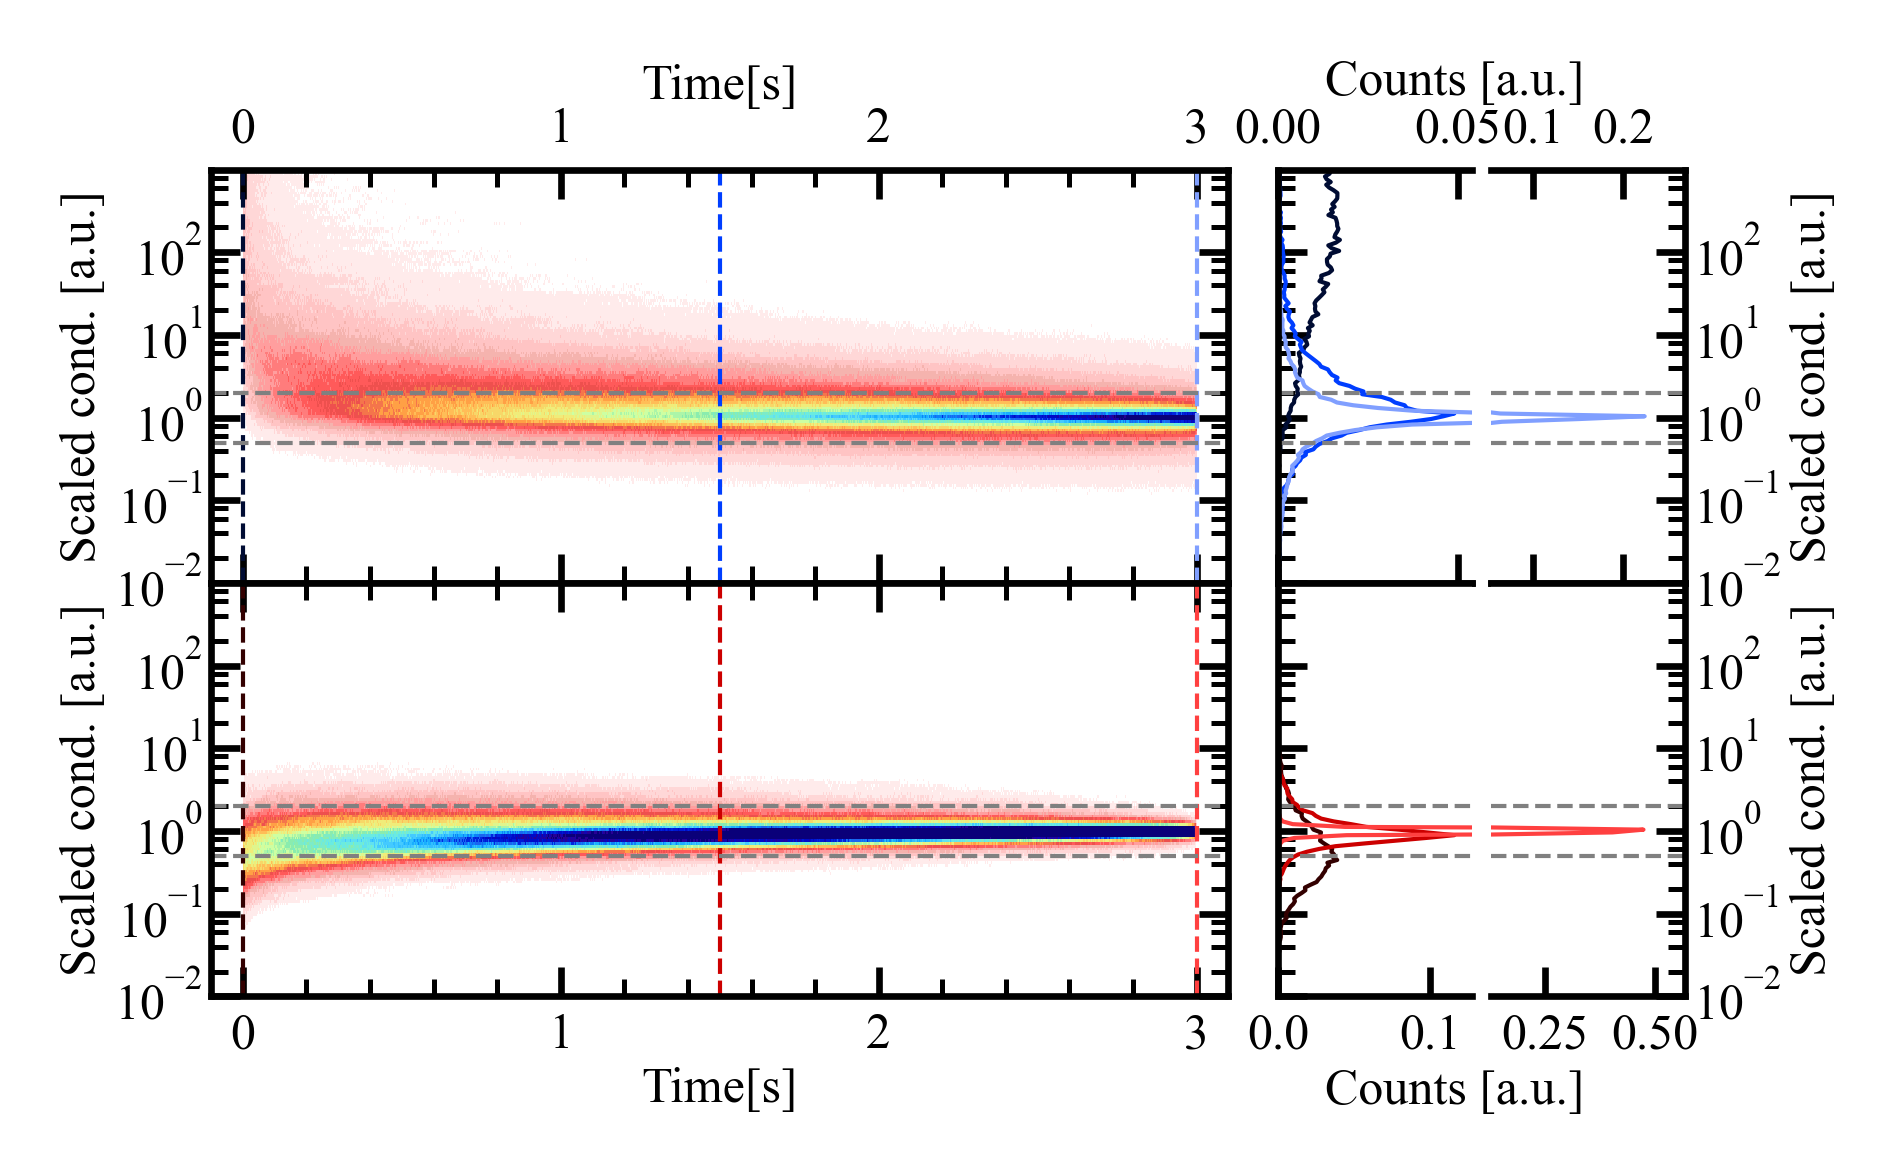

In [152]:
plot_hold_histograms(x_mesh_pull_all_1, y_mesh_pull_all_1, H_pull_all_1,
                     x_mesh_push_all_1, y_mesh_push_all_1, H_push_all_1, vmax_pull=5000, vmax_push=5000)

In [281]:
sum(H_push_all_1[:, 7500])/10

5999.8

In [282]:
sum(H_pull_all_1[:, 7500])/10

5850.3

## all 9000 traces from the measurements where push trigger was $10^{-4}\;G_0$

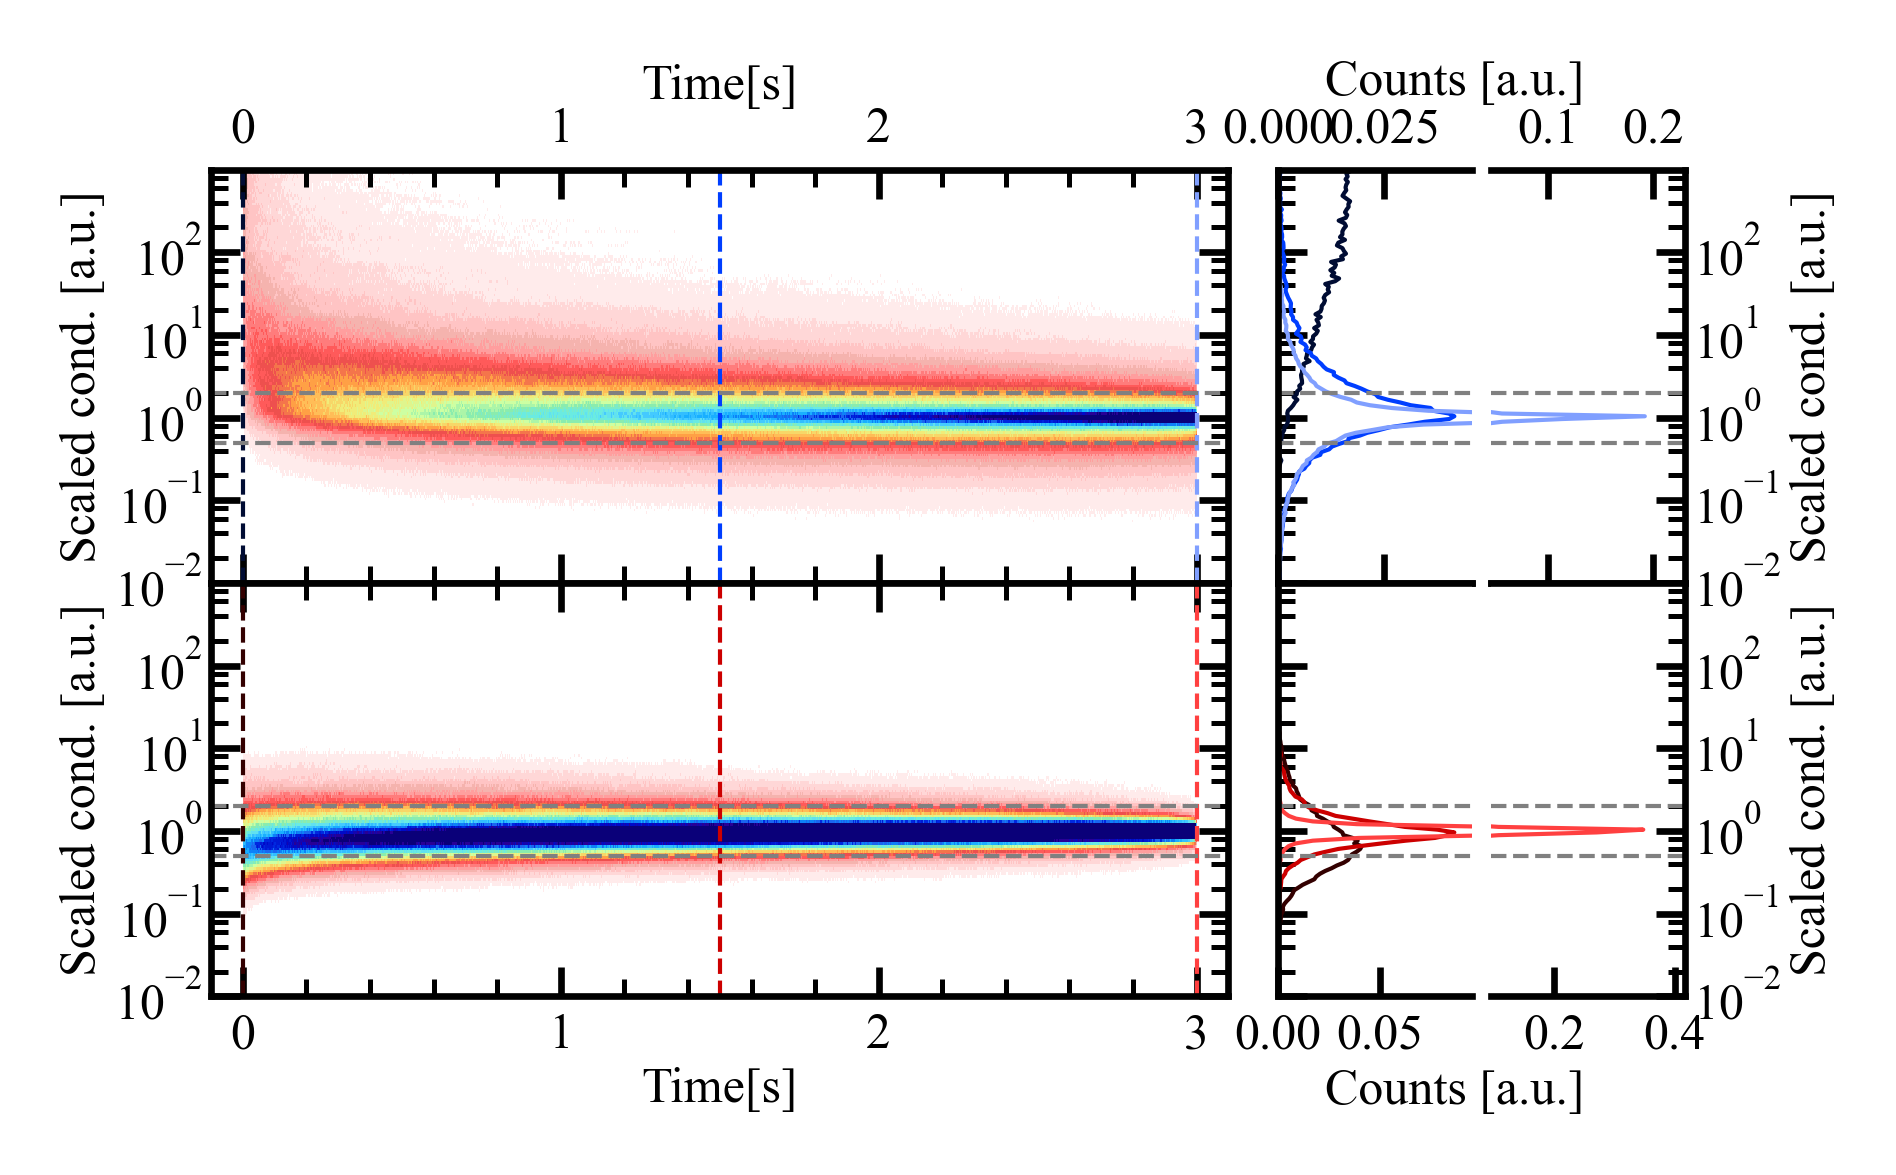

In [155]:
plot_hold_histograms(x_mesh_pull_all_2, y_mesh_pull_all_2, H_pull_all_2,
                     x_mesh_push_all_2, y_mesh_push_all_2, H_push_all_2, vmax_pull=5000, vmax_push=5000)

In [293]:
sum(H_pull_all_2[:, -1])/10

8787.6

In [285]:
sum(H_push_all_2[:, 7500])/10

8998.7

## Filtered traces, condition: conductance > $10^{-5}\;G_0$
pull is for **2635** traces, push for the trigger setting **1e-3**, i.e. **5988** traces

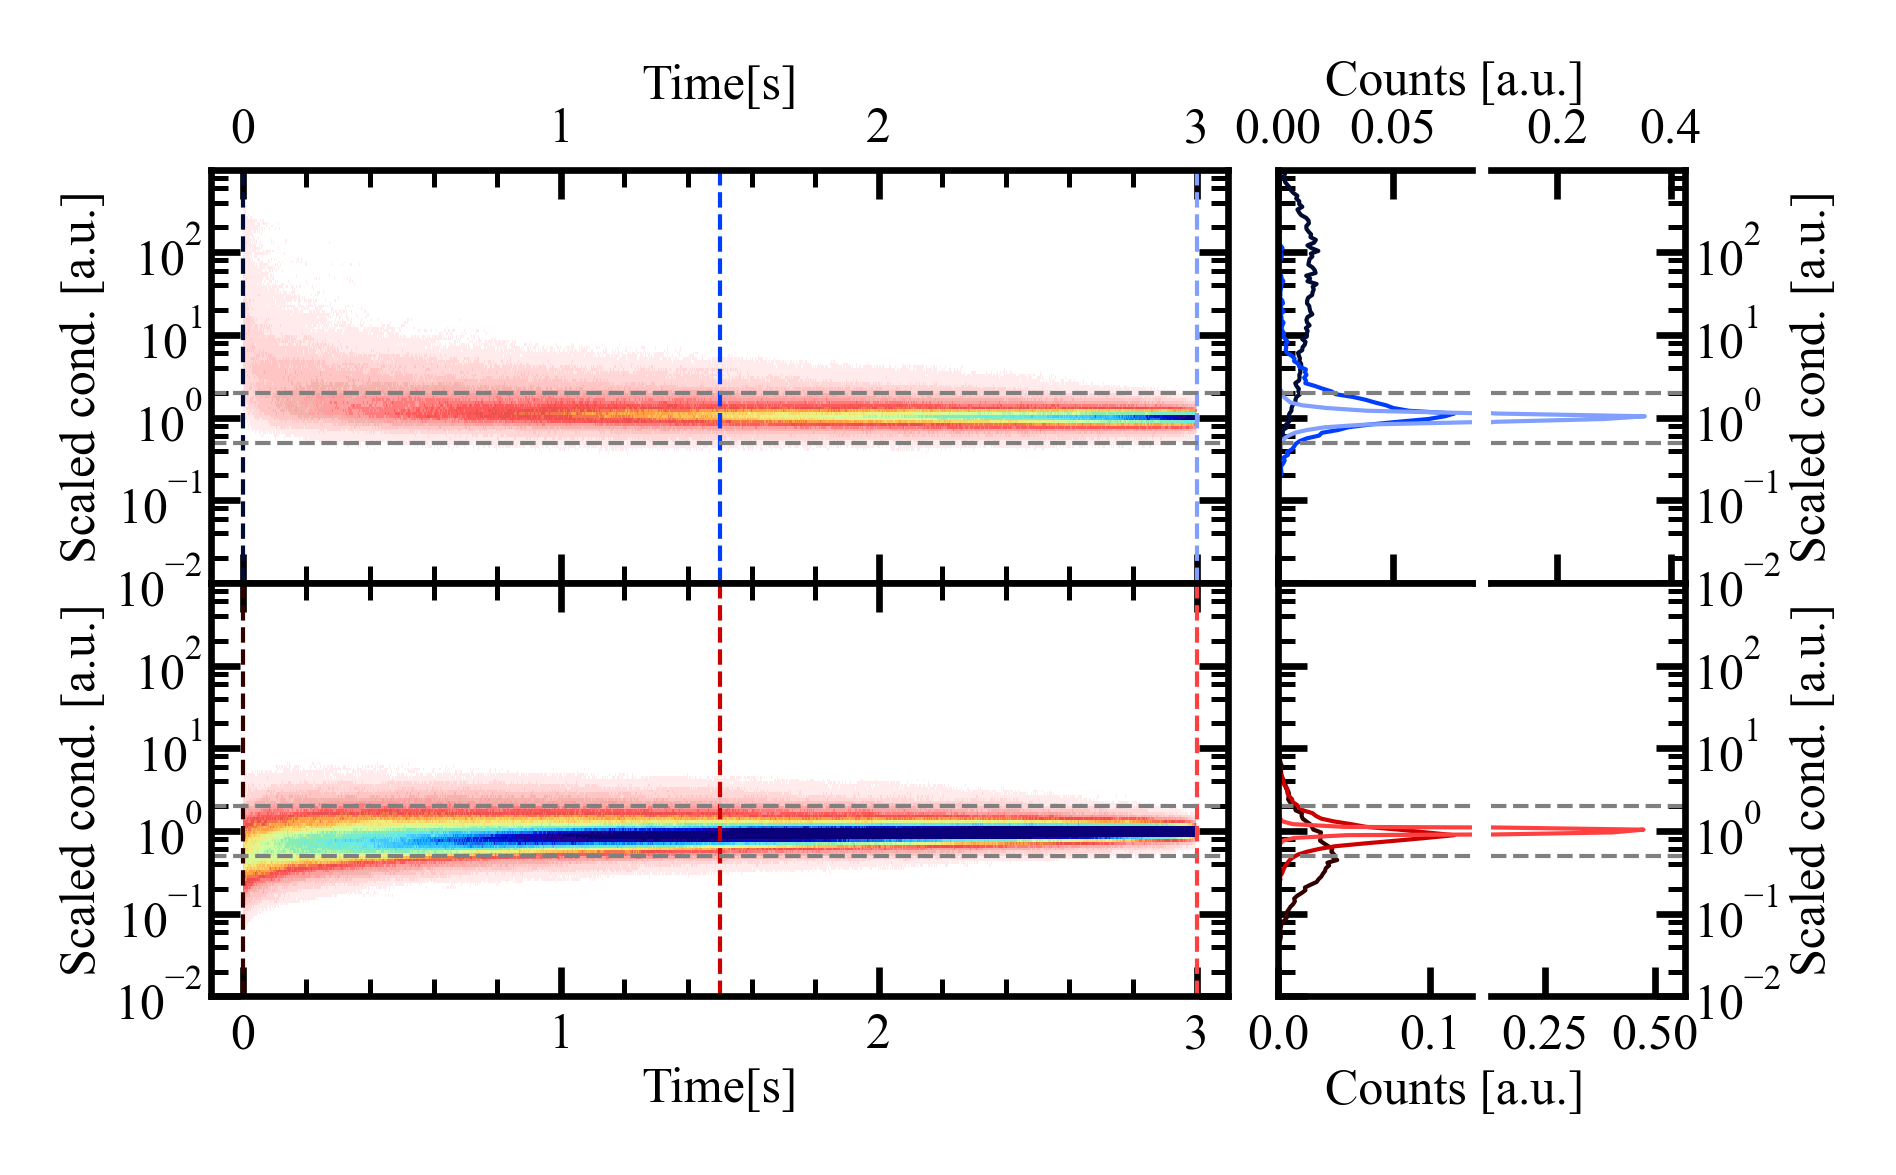

In [156]:
plot_hold_histograms(x_mesh_pull_filt_1, y_mesh_pull_filt_1, H_pull_filt_1,
                     x_mesh_push_filt_1, y_mesh_push_filt_1, H_push_filt_1, vmax_pull=5000, vmax_push=5000)

In [313]:
print(sum(H_pull_filt_1[:, 0])/10)
print(sum(H_push_filt_1[:, 0])/10)

2600.8
5997.2


## Filtered traces, condition: conductance > $10^{-5}\;G_0$
pull is for **2988** traces, push for the trigger setting **1e-4**, i.e. **8511** traces

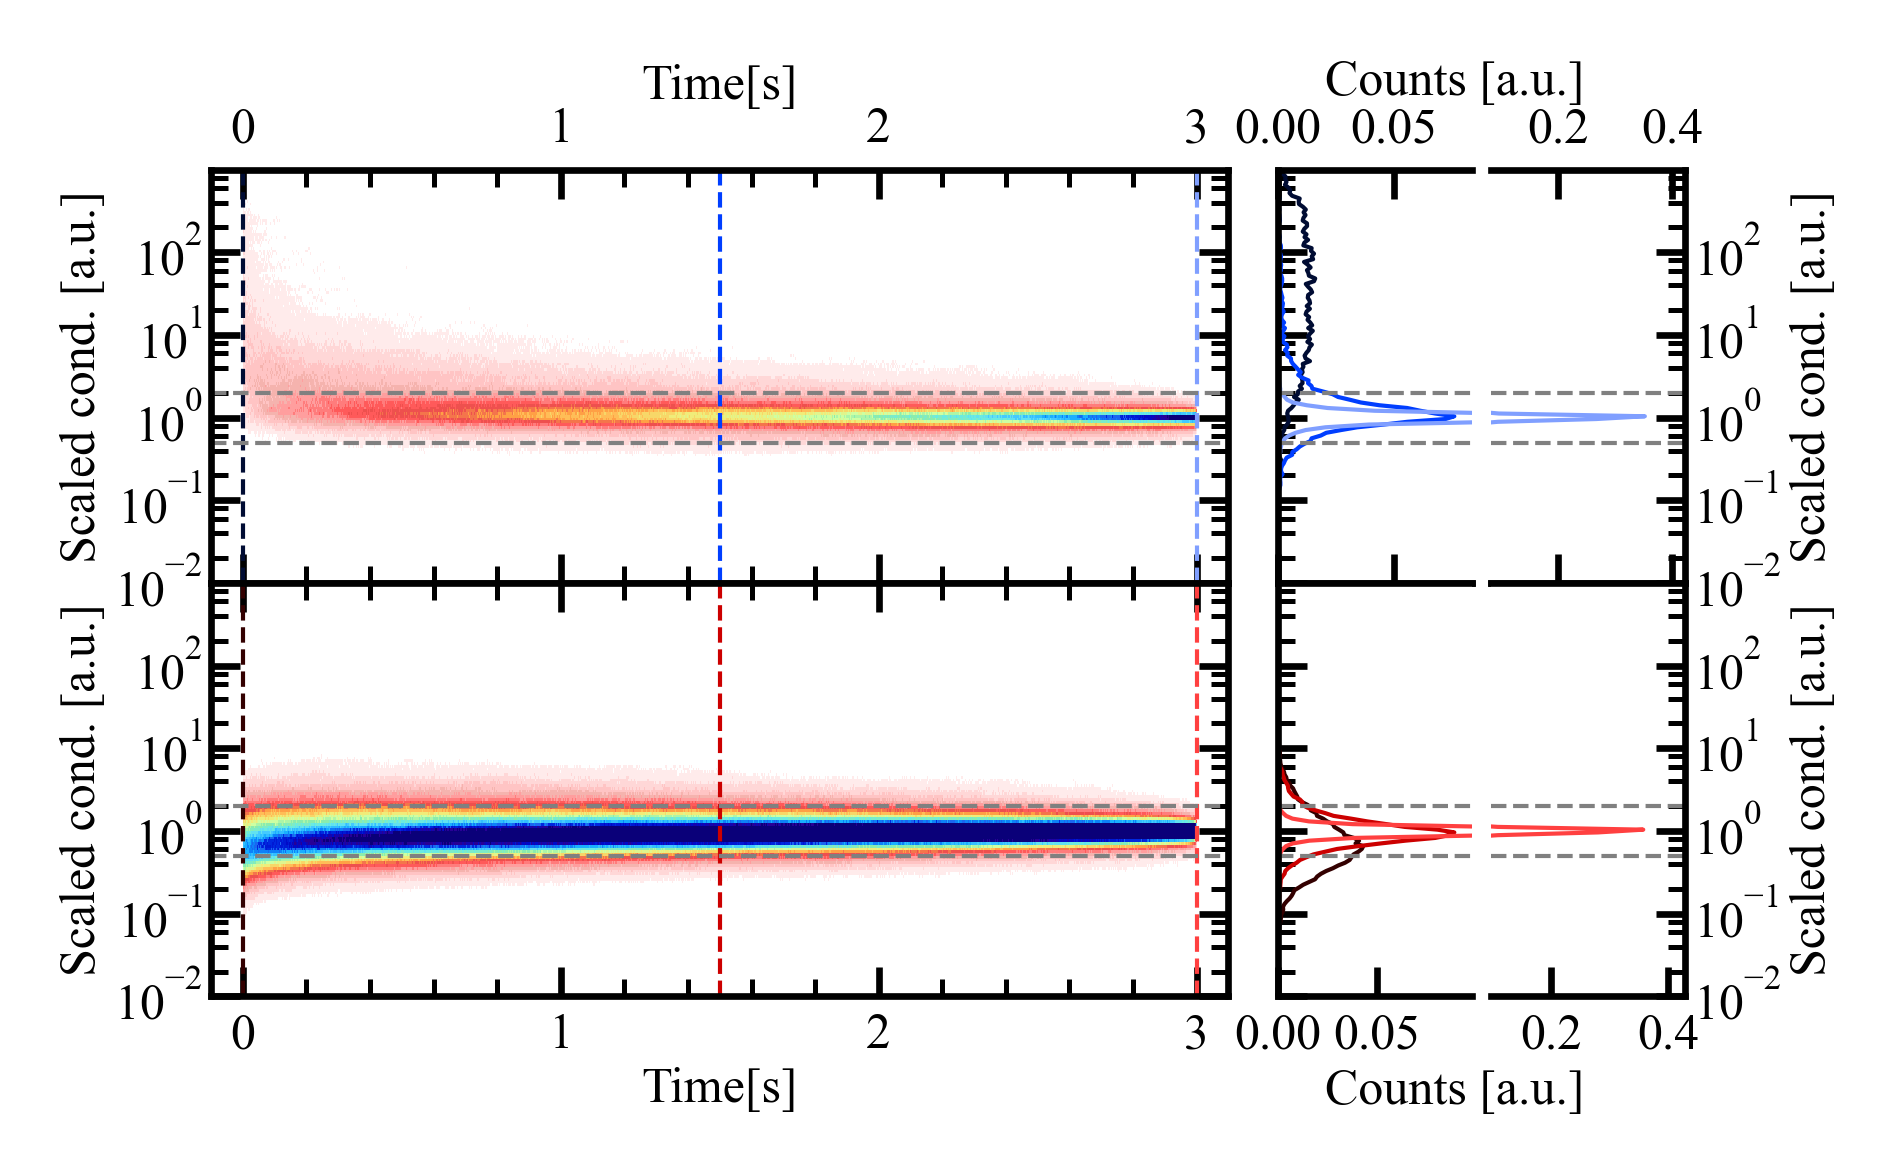

In [157]:
plot_hold_histograms(x_mesh_pull_filt_2, y_mesh_pull_filt_2, H_pull_filt_2,
                     x_mesh_push_filt_2, y_mesh_push_filt_2, H_push_filt_2, vmax_pull=5000, vmax_push=5000)

## Filtered traces, condition: conductance > $10^{-5}\;G_0$
pull is for **5623** traces (both), push for the trigger setting **1e-3**, i.e. **5988** traces

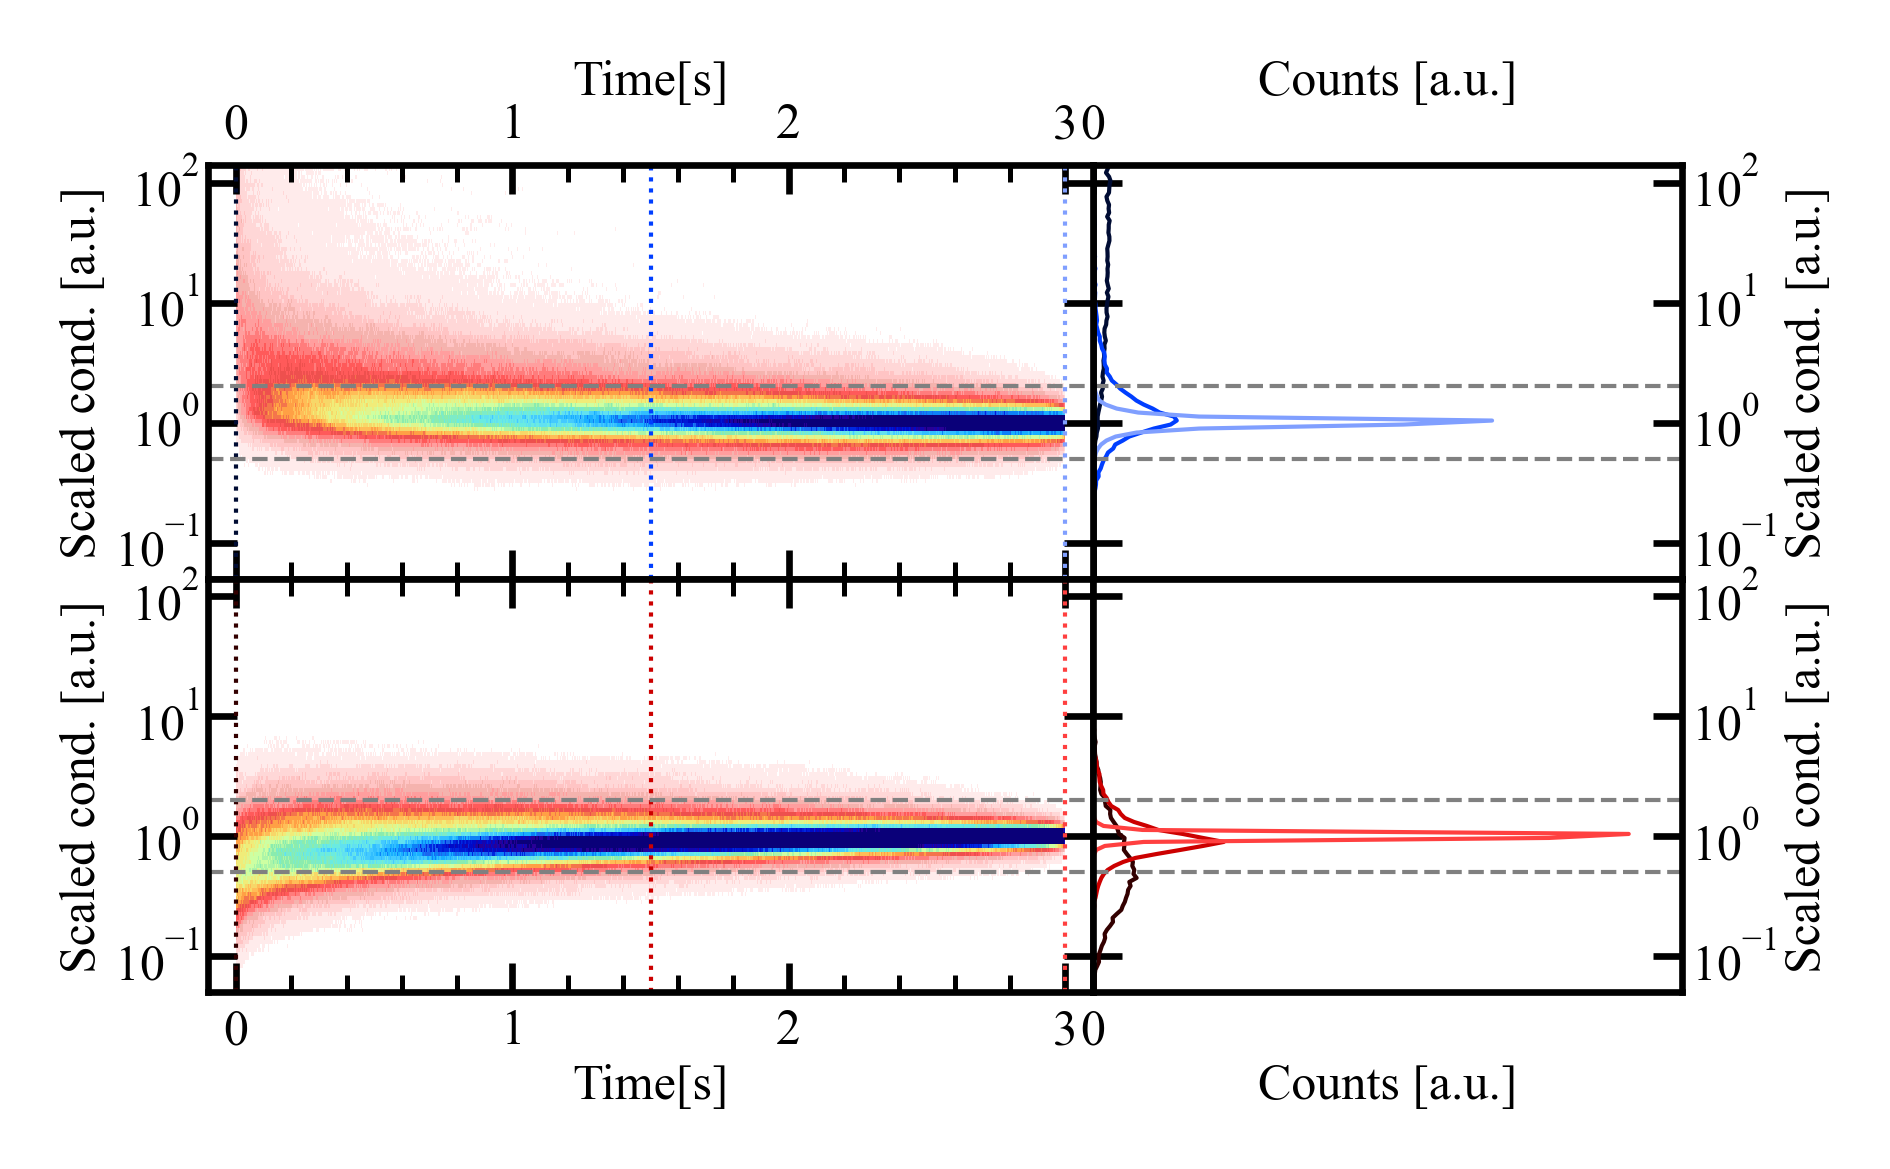

In [315]:
plot_hold_histograms(x_mesh_pull_filt, y_mesh_pull_filt, H_pull_filt,
                     x_mesh_push_filt_1, y_mesh_push_filt_1, H_push_filt_1, vmax_pull=5000, vmax_push=5000)

## Filtered traces, condition: conductance > $10^{-5}\;G_0$
pull is for **5623** traces, push for the trigger setting **1e-4**, i.e. **8511** traces

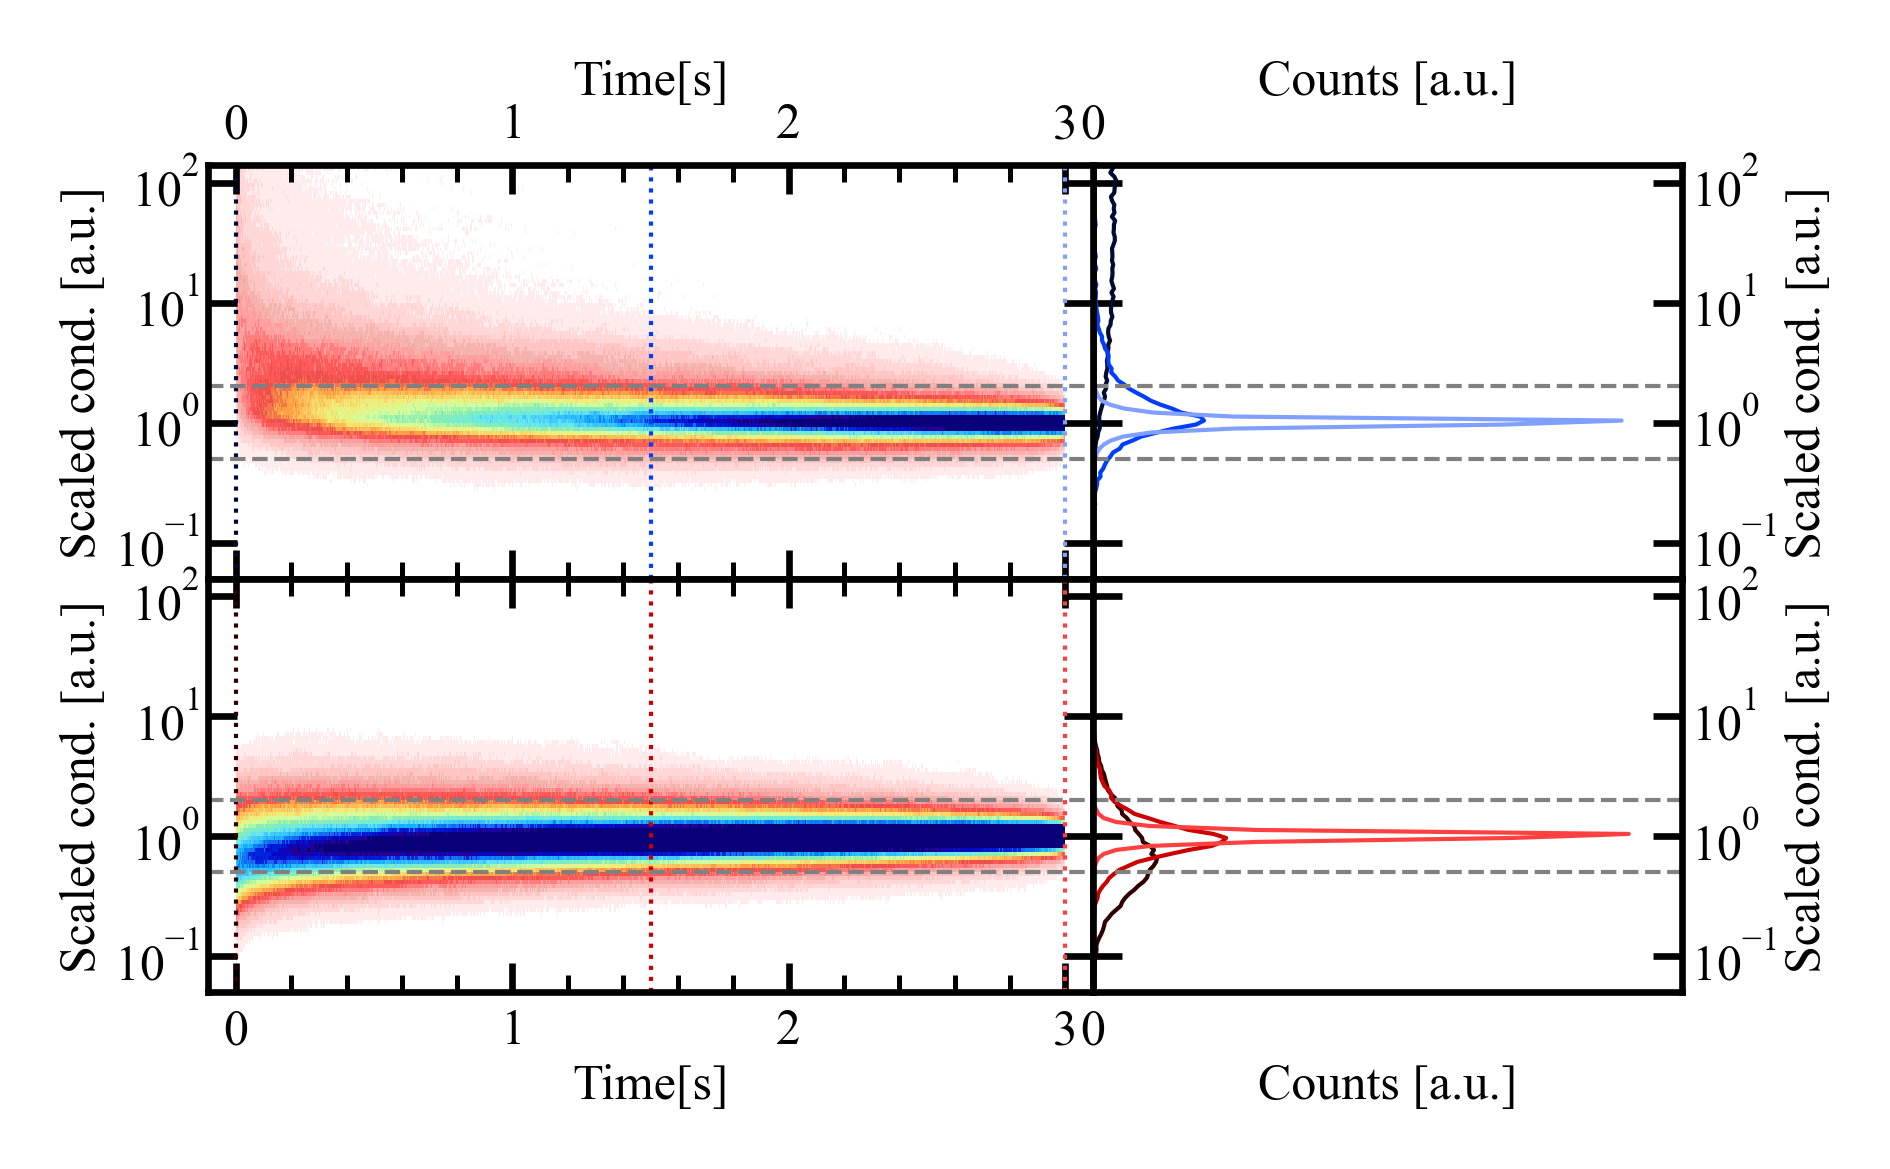

In [317]:
plot_hold_histograms(x_mesh_pull_filt, y_mesh_pull_filt, H_pull_filt,
                     x_mesh_push_filt_2, y_mesh_push_filt_2, H_push_filt_2, vmax_pull=5000, vmax_push=5000)

In [286]:
sum(H_pull_filt_2[:, 7500])/10

2953.9

In [287]:
sum(H_push_filt_2[:, 7500])/10

8511.0